In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [55]:
dataset = pd.read_excel("1645792390_cep1_dataset.xlsx")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#1.Preliminary analysis:
#a.Perform preliminary data inspection and report the findings on the structure
# of the data, missing values, duplicates, etc.

# to get information from dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
dataset['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [58]:
print(dataset.isnull().sum())
print ("=>There is no null values in the dataset")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
=>There is no null values in the dataset


In [59]:
def plot_for_subplot(col_names, target_y, color, nrows, ncols, plot_type) :
    total = len(col_names)
    n = 0
    plt_bar = list(range(total))
    fig, axe = plt.subplots(nrows, ncols, figsize=(12,8))

    for i in (range(nrows)) :
        for j in (range(ncols)) :    
            match (plot_type) :
                case ("countplot") :
                    plt_bar[n] = sns.countplot(x=dataset[col_names[n]], hue='target', data=dataset,
                                               palette='mako',
                                               ax=axe[i][j])
                case ("boxplot") :
                    plt_bar[n] = sns.boxplot(x=dataset[col_names[n]], 
                                             color=color[np.mod(n+i, ncols)], ax=axe[i][j])
                case ("histplot") :
                    temp_bin = dataset[col_names[n]].max()-dataset[col_names[n]].min()
                    if temp_bin > 50 :
                        temp_bin = temp_bin // 10
                    elif temp_bin < 10 :
                        temp_bin = int(temp_bin)
                    else :
                        temp_bin = temp_bin // 4
                    plt_bar[n] = sns.histplot(x=dataset[col_names[n]], hue='target',
                                              data=dataset, multiple='stack',
                                              bins=temp_bin,
                                              palette = 'bwr', ax=axe[i][j])
                case("barplot") :
                    plt_bar[n] = sns.barplot(x=dataset[col_names[n]], y = 'target', data=dataset,
                                               hue='target', color=color[np.mod(n+i, ncols)], ax=axe[i][j])
                case _ :
                    print("Wrong plot type")
                    break
            n = n + 1
            if n == total :
                break
    plt.tight_layout()
    

=>The columns trestbps, chol, thalach, oldpeak, ca, thal have outliers.


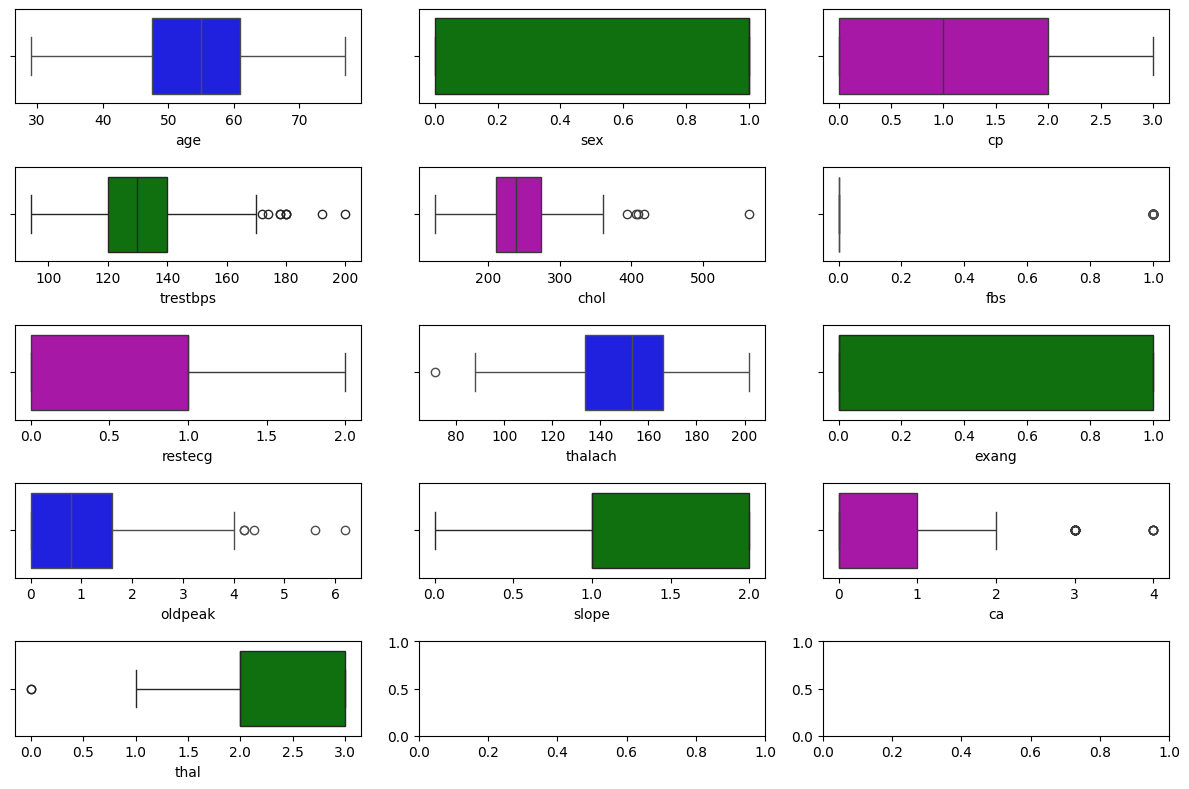

In [60]:
# The columns trestbps, chol, fbs, thalach, oldpeak, ca, thal have outliers.
col_name = [col for col in dataset.columns.to_list() if col != 'target']
plot_for_subplot(col_name, None, ['b','g','m'], 5, 3, "boxplot")
print("=>The columns trestbps, chol, thalach, oldpeak, ca, thal have outliers.")

## Drop one duplicated row
dataset.drop(labels =[dup.index[0]], axis = 0, inplace=True)

In [61]:
dup = dataset[dataset.duplicated() == True]
print(dup.index)
print ("Now we have no duplicated row")

Index([164], dtype='int64')
Now we have no duplicated row


In [62]:
# outlier detect using iqr
# parameter data : Lit or Series
# returns outliers in List
def detect_outliers_iqr(data):
    outliers=[]
    data=sorted(data)
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    iqr=q3-q1
    
    lwr=q1-(1.5*iqr)
    upr=q3+(1.5*iqr)
    
    for i in data:
        if (i < lwr or i > upr):
            outliers.append(i)
    return outliers


# outlier detect using zscore
# parameter data : List or Series
# returns outliers in List
# threshold Z = |3|

def detect_outliers_zscore(data):

    outliers=[]
    thres=3
    mean=np.mean(data)
    st=np.std(data)
    for i in data:
        z=(i-mean)/st
        if (np.abs(z)>thres):
            outliers.append(i)
    return outliers

In [63]:
print("Outlier values in the dataset by column name :")
i = 0
for col in dataset.columns :
    outliers_val = []
    outliers_val = detect_outliers_zscore(dataset[col])
    if len (outliers_val) > 0 :
        i += 1
        print(col, ":", outliers_val)
print('Percentage of outliers in the whole rows : {:.2f} %'
      .format(i/dataset.shape[0]*100))
            

Outlier values in the dataset by column name :
trestbps : [200, 192]
chol : [417, 564, 407, 409]
thalach : [71]
oldpeak : [6.2, 5.6]
ca : [4, 4, 4, 4, 4]
thal : [0, 0]
Percentage of outliers in the whole rows : 1.98 %


In [64]:
for col in dataset.columns :
    outliers_val = []
    outliers_val = detect_outliers_zscore(dataset[col])
    if len(outliers_val) > 0 :
        i = 0
        for x in outliers_val :
            outliers_row = dataset[dataset[col] == x]
            dataset.drop(labels=outliers_row.index, axis=0, inplace=True)
            i = i + 1
        print ('{:d} outlier values are dropped in column {:s}'
           .format(i, col))

2 outlier values are dropped in column trestbps
4 outlier values are dropped in column chol
1 outlier values are dropped in column thalach
2 outlier values are dropped in column oldpeak
5 outlier values are dropped in column ca
2 outlier values are dropped in column thal


In [65]:
print(dataset['fbs'].value_counts())
print("=>", round(dataset['fbs'].value_counts()[1]/dataset.shape[0]*100, 1), "% have value 1")
print("But fbs means fasting blood sugar > 120 mg/dl, so it is not outlier")

fbs
0    246
1     41
Name: count, dtype: int64
=> 14.3 % have value 1
But fbs means fasting blood sugar > 120 mg/dl, so it is not outlier


In [66]:
# 2.Prepare a report about the data explaining the distribution of the disease 
# and the related factors using the steps listed below:
# a.Get a preliminary statistical summary of the data and explore the measures 
# of central tendencies and spread of the data

dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.334495,0.689895,0.972125,131.024390,244.501742,0.142857,0.533101,149.804878,0.327526,1.004878,1.411150,0.658537,2.313589,0.550523
std,9.093125,0.463344,1.037373,16.991856,45.920719,0.350538,0.527017,22.550570,0.470131,1.080684,0.607311,0.924675,0.584703,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


=> categorical variables : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
: male participant number is twice than female
: chest pain type 0 is dominant
: Fasting blood sugar > 120 mg/dl is 85.1 % of total number
: Most Resting electrocardiographic results is 0 and 1 with similar distribution
: Most slope is 1 and 2 with similar distribution
: Number of major vessels (0-3) colored by fluoroscopy 0 is dominant


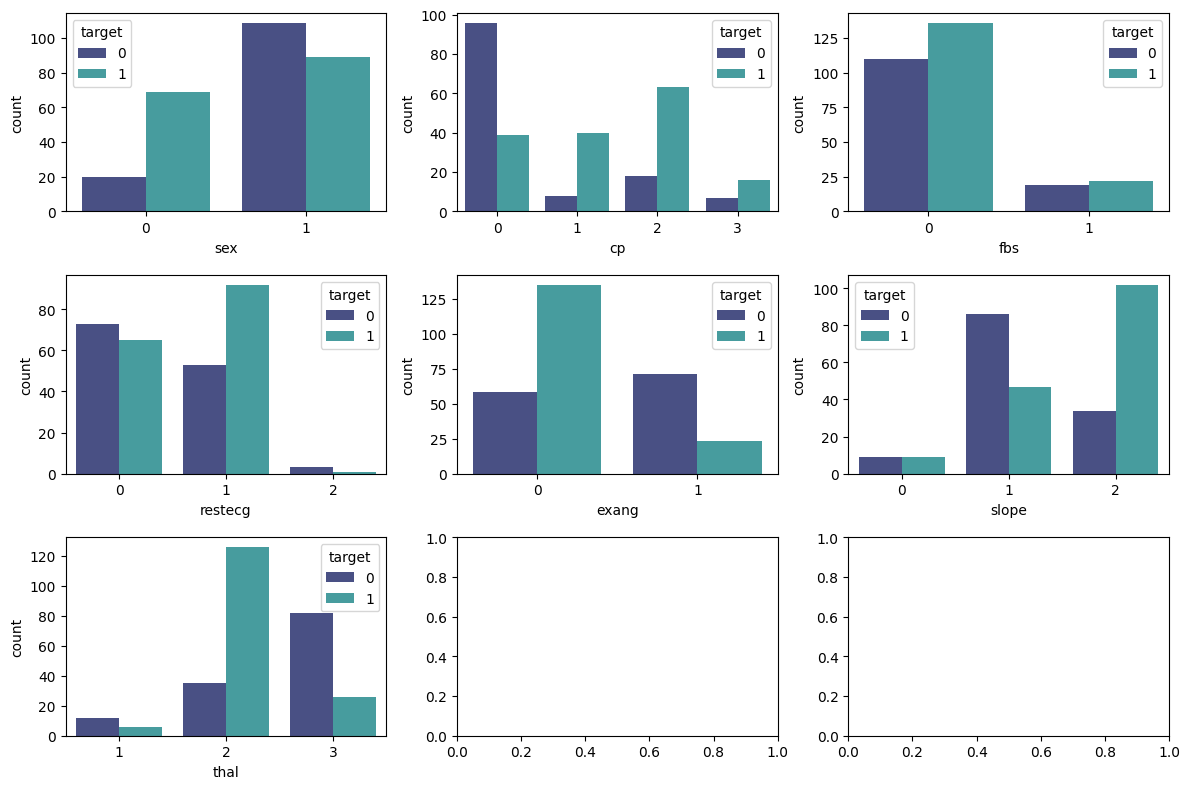

In [67]:
# b.Identify the data variables which are categorical and describe and 
# explore these variables using the appropriate tools, such as count plot 

# Draw coutplots for categorical variables
descrete_col_name=['sex','cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
plot_for_subplot(descrete_col_name, None, ['b','y','c'], 3, 3, "countplot")
print("=> categorical variables :", descrete_col_name)
print(": male participant number is twice than female")
print(": chest pain type 0 is dominant")
print(": Fasting blood sugar > 120 mg/dl is 85.1 % of total number")
print(": Most Resting electrocardiographic results is 0 and 1 with similar distribution")
print(": Most slope is 1 and 2 with similar distribution")
print(": Number of major vessels (0-3) colored by fluoroscopy 0 is dominant")

=> Graph age scewed right
=> Graph trestbps scewed left
=> Graph chol is close to normal distribution except for some values especially between 300 - 320
=> Graph thalach scewed right


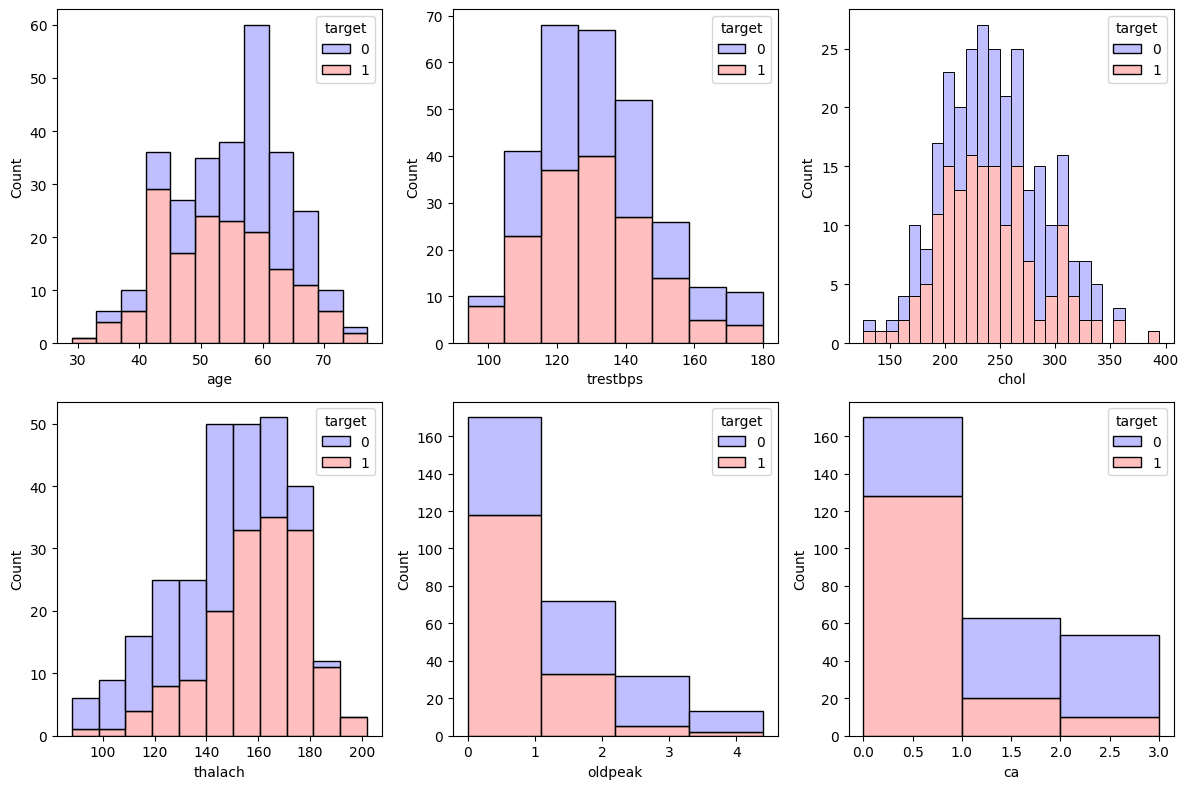

In [68]:
# Draw histograms for continuous variables

continuous_col_name = [col for col in dataset.columns.to_list() if col not in descrete_col_name and col != 'target']
plot_for_subplot(continuous_col_name, None, ['b','y','c'], 2, 3, "histplot")

print("=> Graph age scewed right")
print("=> Graph trestbps scewed left")
print("=> Graph chol is close to normal distribution except for some values especially between 300 - 320")
print("=> Graph thalach scewed right")

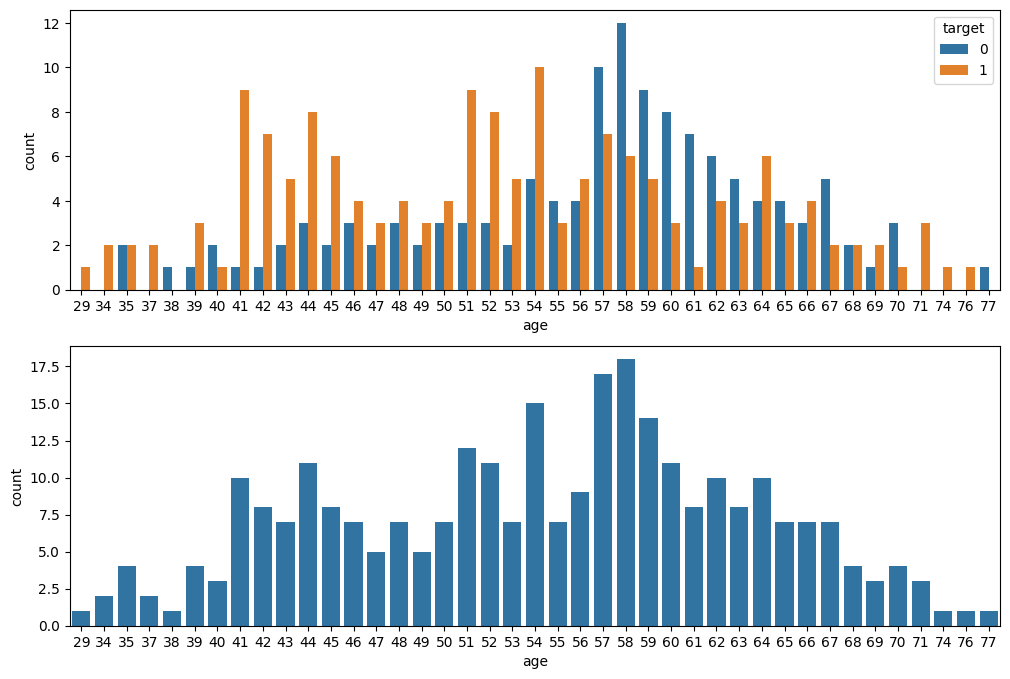

=> After comparing # of actual participants to # of people who got cancer,

 the age 41,44,64 (in the order) seems most remarkable for occurances of CDV


In [69]:
# c.Study the occurrence of CVD across the Age category
# count the number of people who got cancer across age category

fig, axe = plt.subplots(2,1, figsize=(12,8))
sns.countplot(data=dataset, x='age', hue='target', ax=axe[0])
sns.countplot(x=dataset['age'], ax=axe[1])
plt.show()
print("=> After comparing # of actual participants to # of people who got cancer,\n")
print(" the age 41,44,64 (in the order) seems most remarkable for occurances of CDV")


In [70]:
# make four age groups :
# group1 :age =< 40
# group2 : age 41-55, 
# group3 : age 56-70
# group4 : age>=70
# get percentage of occurance of CVD for each group

age_tot_group = dataset[['age', 'target']]

ngroup=4
age_group =list(range(ngroup))

age_group[0] = age_tot_group[age_tot_group['age']<40]
age_group[1] = age_tot_group[(age_tot_group['age']>40)&(age_tot_group['age']<=55)]
age_group[2] = age_tot_group[(age_tot_group['age']>55)&(age_tot_group['age']<=70)]
age_group[3] = age_tot_group[age_tot_group['age']>70]


for i in range(ngroup) :
    print("group", i, ": ", 
          round(age_group[i][age_group[i]['target'] == 1]['age'].count()*100/age_group[i].shape[0],1),
          "(number of members:", 
          age_group[i].shape[0], ")")
print("The number of members for the age group 0 and group 3 is smaller than other 2 groups.")

group 0 :  71.4 (number of members: 14 )
group 1 :  69.3 (number of members: 127 )
group 2 :  39.4 (number of members: 137 )
group 3 :  83.3 (number of members: 6 )
The number of members for the age group 0 and group 3 is smaller than other 2 groups.


In [71]:
# Chi-Square test
# age has almost no relationship with target i.e. the occurrence of CVD
# But to make sure, perfom the Chi2 test for the relationship between age and target

# H0 : There is no significant difference of CVD occurence across age category
# H1 : There is siggnificant of CVD occurence across age category


age_ct = pd.crosstab(dataset['age'], dataset['target'])

In [72]:
from scipy import stats

stat, p_value, dof, expected = stats.chi2_contingency(age_ct)
# interpret p-value
alpha = 0.05
print("Statistics :", stat)
print("p-value :", p_value)
if (p_value > alpha) :
    print ("Reject H0")
    print("=> There is no significant difference of CVD occurence across age category")
else :
    print ("Accept H0")
    print("=> There is significant difference of CVD occurence across age category")

Statistics : 51.34308802219264
p-value : 0.10787022799599133
Reject H0
=> There is no significant difference of CVD occurence across age category


In [73]:
# d.Study the composition of all patients with respect to the Sex category
# Assume total population has normal distribution, and perform T-test
# H0 : There is no significant difference of CVD occurence between male group and female group
# H1 : There is significant difference of CVD occurence between male group and female group


male_CVD = dataset[dataset['sex'] == 1]['target']
female_CVD = dataset[dataset['sex'] == 0]['target']

stat, p_val = stats.ttest_ind(male_CVD, female_CVD, equal_var=False)

# interpret p-value
alpha = 0.05
print("Statistics :", stat)
print("p-value :", p_val)
if (p_val > alpha) :
    print ("Reject H0")
    print("=> There is no significant difference of CVD occurence between male group and female group")
else :
    print ("Accept H0")
    print("=> There significant difference of CVD occurence between male group and female group")

Statistics : -5.727131390869522
p-value : 3.721906973588586e-08
Accept H0
=> There significant difference of CVD occurence between male group and female group


In [74]:
# e.Study if one can detect heart attacks based on anomalies in the resting 
# blood pressure (trestbps) of a patient

# H0 : one can not detect heart attacks based on anomalies 
# in the resting blood pressure of a patient
# H1 : one can detect heart attacks based on anomalies
# in the resting blood pressure of a patient

trestbps_ct = pd.crosstab(dataset['trestbps'], dataset['target'])
stat, p_val, dof, expected = stats.chi2_contingency(trestbps_ct)
# interpret p-value
alpha = 0.05
print("Statistics :", stat)
print("p-value :", p_val)
if (p_val > alpha) :
    print ("Reject H0")
    print("=> one can not detect heart attacks based on anomalies in the resting blood pressure of a patient")
else :
    print ("Accept H0")
    print("=> one can detect heart attacks based on anomalies in the resting blood pressure of a patient")

Statistics : 42.99425323901205
p-value : 0.5989028678209443
Reject H0
=> one can not detect heart attacks based on anomalies in the resting blood pressure of a patient


In [75]:
# f. Describe the relationship between cholesterol levels and a target variable

print("The correlation between cholesterol levels and target is :", 
      round(dataset[['target', 'chol']].corr()['chol'][0], 2))
print("There is not significant correlation between cholesterol level and target")

chol_ct = pd.crosstab(dataset['chol'], dataset['target'])
stat, p_val, dof, expected = stats.chi2_contingency(chol_ct)
# interpret p-value
alpha = 0.05
print("Statistics :", stat)
print("p-value :", p_val)
if (p_val > alpha) :
    print ("Reject H0")
    print("=> There is no significant relationship between cholesterol level and the occurrence of a heart attack")
else :
    print ("Accept H0")
    print("=> There is significant relationship between cholesterol level and the occurrence of a heart attack")

The correlation between cholesterol levels and target is : -0.1
There is not significant correlation between cholesterol level and target
Statistics : 165.02124505282436
p-value : 0.11086946140063769
Reject H0
=> There is no significant relationship between cholesterol level and the occurrence of a heart attack


In [76]:
# g.State what relationship exists between peak exercising and 
# the occurrence of a heart attack
# H0 : There is no significant relationship between peak exercising and the occurrence of a heart attack
# H1 : There is significant relationship between peak exercising and the occurrence of a heart attack
# old peak : negative slope : positive
oldpeak_ct = pd.crosstab(dataset['oldpeak'], dataset['target'])
stat, p_val, dof, expected = stats.chi2_contingency(oldpeak_ct)
# interpret p-value
alpha = 0.05
print("Statistics :", stat)
print("p-value :", p_val)
if (p_val > alpha) :
    print ("Reject H0")
    print("=> There is no significant relationship between peak exercising and the occurrence of a heart attack")
else :
    print ("Accept H0")
    print("=> There is significant relationship between peak exercising and the occurrence of a heart attack.")
    


Statistics : 80.9288281936516
p-value : 4.056497596254438e-05
Accept H0
=> There is significant relationship between peak exercising and the occurrence of a heart attack.


In [77]:
# h. Check if thalassemia is a major cause of CVD

# H0 : There is no significant relationship between thal and the occurrence of a heart attack
# H1 : There is significant relationship between thal and the occurrence of a heart attack
# old peak : negative slope : positive
thal_ct = pd.crosstab(dataset['thal'], dataset['target'])
stat, p_val, dof, expected = stats.chi2_contingency(thal_ct)
# interpret p-value
alpha = 0.05
print("Statistics :", stat)
print("p-value :", p_val)
if (p_val > alpha) :
    print ("Reject H0")
    print("=> There is no significant relationship between thalassemia  and the occurrence of a heart attack")
else :
    print ("Accept H0")
    print("=> There is significant relationship between thalassemia  and the occurrence of a heart attack.")


Statistics : 80.36201442939057
p-value : 3.54495143104438e-18
Accept H0
=> There is significant relationship between thalassemia  and the occurrence of a heart attack.


In [78]:
# i.List how the other factors determine the occurrence of CVD

# check one more cetegorical value 'fbs' for the relationship
fbs1 = dataset[dataset['fbs'] == 1]['target']
fbs2 = dataset[dataset['fbs'] == 0]['target']

stat, p_val = stats.ttest_ind(fbs1, fbs2, equal_var=True)
print(p_val)

0.8470079154812832


In [79]:
# Use visualization method to examin how other factors determine 
# the occurrence of CVD

graph_data=dataset.copy()


graph_data.rename({'cp' :'chest_pain_type',
             'trestbps':'resting_blood_pressure', 
             'chol':'cholesterol', 
             'fbs' :'fasting_blood_sugar', 
             'restecg':'resting_ecg',
             'thalach' : 'max_heart_rate',
             'exang':'exercise_induced_angina',
             'oldpeak':'st_depression',
             'slope':'st_slope',
             'ca' : 'major_vessels', 
             'thal' :'thalessimia' },axis = 1, inplace = True)

In [80]:
graph_data.loc[graph_data.sex == 0 , 'sex'] = 'female'
graph_data.loc[graph_data.sex == 1, 'sex'] = 'male'

graph_data.loc[graph_data.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
graph_data.loc[graph_data.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
graph_data.loc[graph_data.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
graph_data.loc[graph_data.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'

graph_data.loc[graph_data.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
graph_data.loc[graph_data.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

graph_data.loc[graph_data.resting_ecg == 0, 'resting_ecg']  = 'normal'
graph_data.loc[graph_data.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
graph_data.loc[graph_data.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

graph_data.loc[graph_data.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
graph_data.loc[graph_data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

graph_data.loc[graph_data.st_slope == 0, 'st_slope'] = 'upsloping'
graph_data.loc[graph_data.st_slope == 1, 'st_slope'] = 'flat'
graph_data.loc[graph_data.st_slope == 2, 'st_slope'] = 'downsloping'

graph_data.loc[graph_data.thalessimia == 1,'thalessimia'] = 'normal'
graph_data.loc[graph_data.thalessimia == 2,'thalessimia'] = 'fixed defect'
graph_data.loc[graph_data.thalessimia == 3,'thalessimia'] = 'reversable defect'

In [81]:
cvd_g_data = graph_data[graph_data['target'] == 1].copy()
none_cvd_g_data = graph_data[graph_data['target'] == 0].copy()

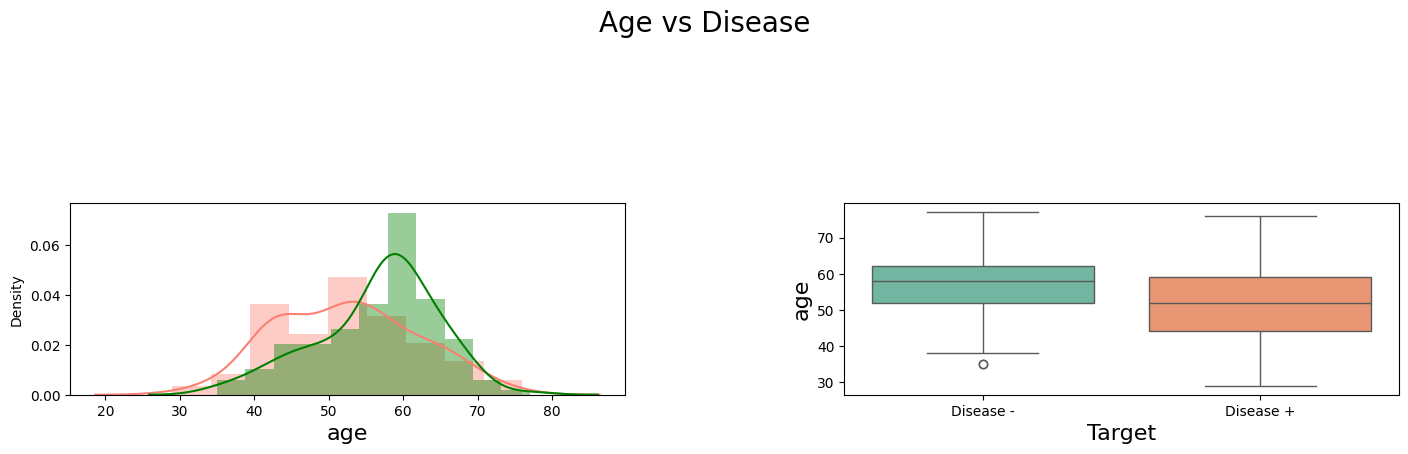

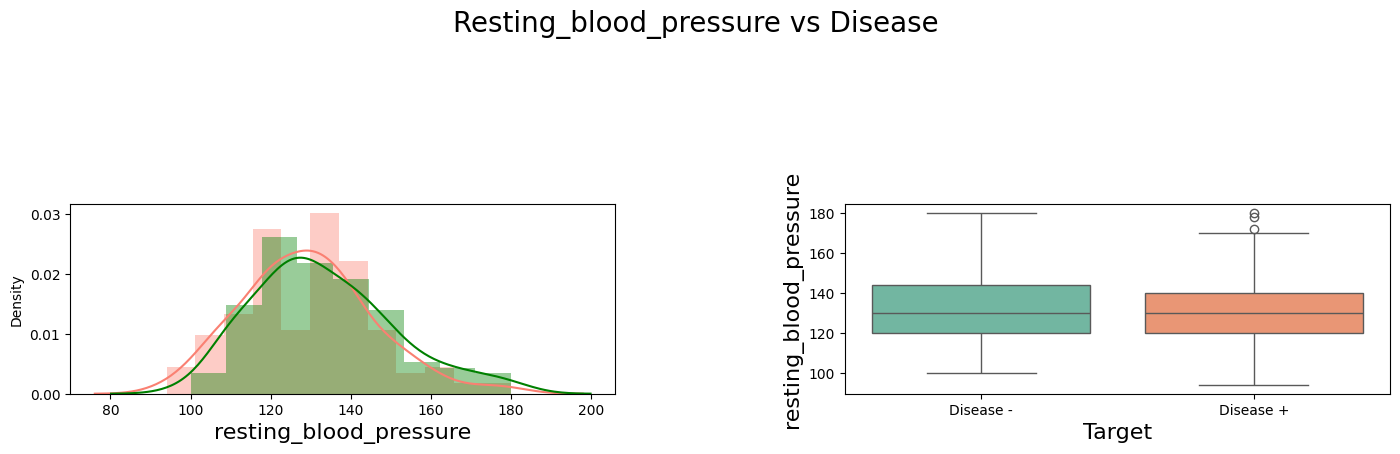

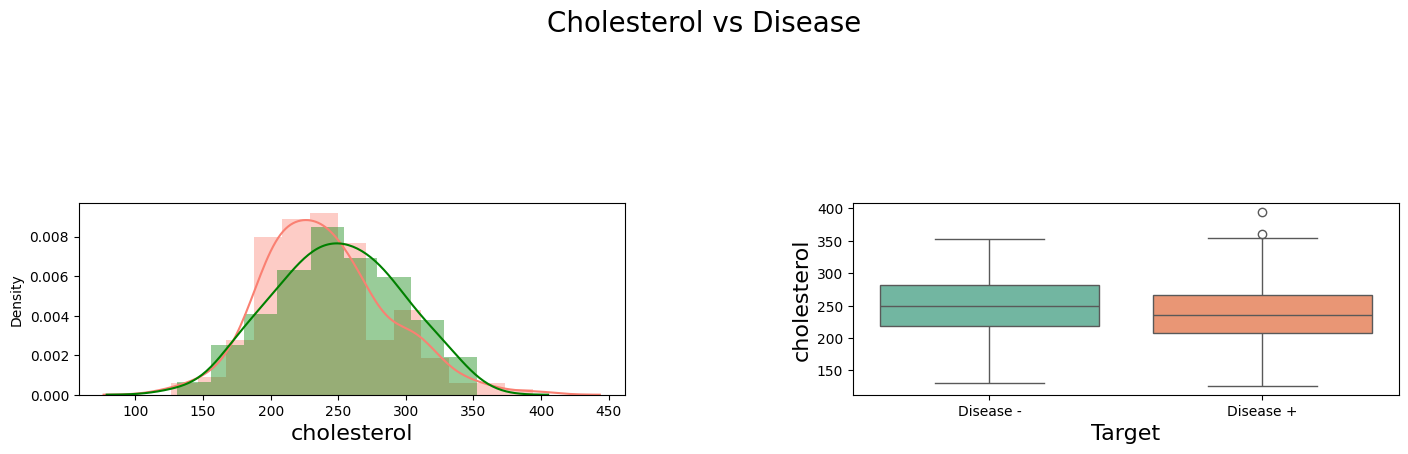

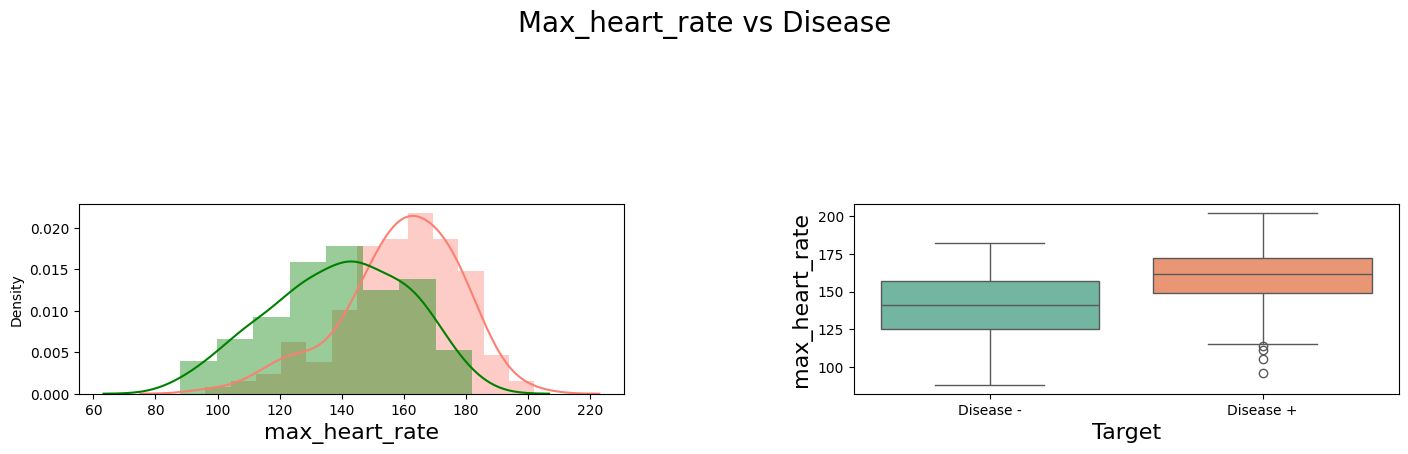

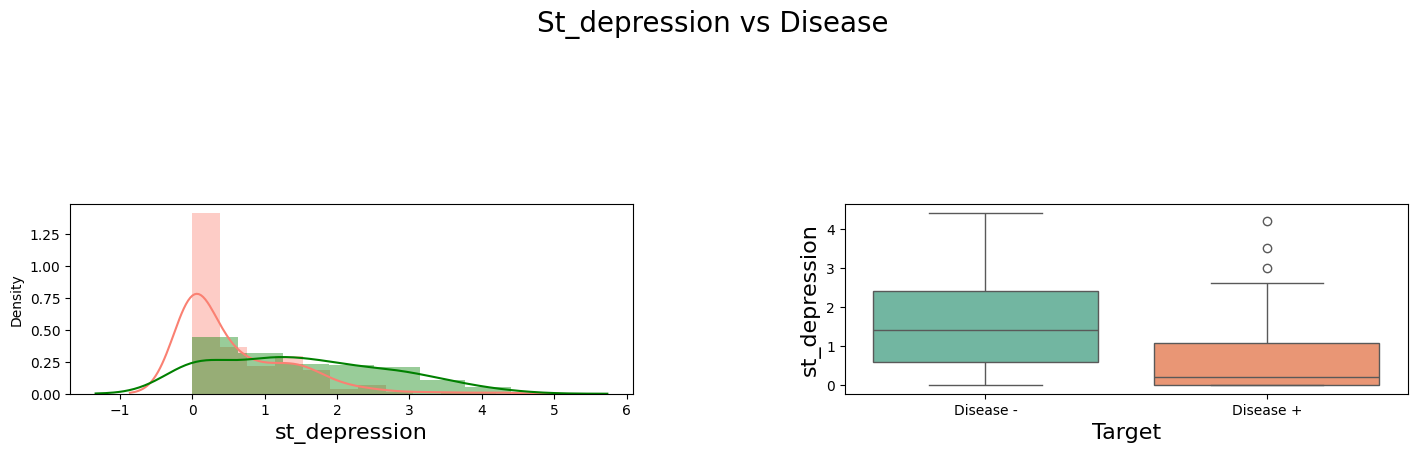

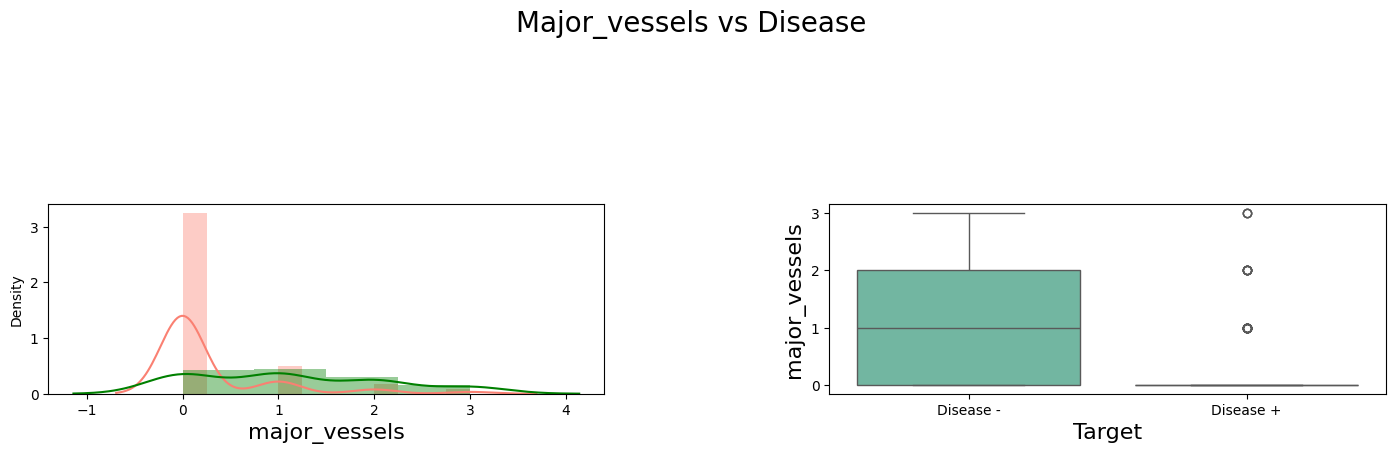

In [82]:
graph_des_col_name = ['chest_pain_type', 'sex', 'fasting_blood_sugar', 'resting_ecg', 
                           'exercise_induced_angina', 'st_slope','thalessimia']
graph_cont_col_name = [col for col in graph_data if col not in graph_des_col_name and 
                       col != 'target']

def continuous_distribution(var):
    f,axes = plt.subplots(1,2, figsize = (15,5))
    sns.distplot(cvd_g_data[var],ax = axes[0], color = 'salmon')
    sns.distplot(none_cvd_g_data[var], ax = axes[0], color = 'green')
    sns.boxplot(y = graph_data[var], x = graph_data.target, ax = axes[1], palette='Set2')
    axes[0].set_xlabel(var, fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_ylabel(var, fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xlabel('Target', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xticklabels(['Disease -','Disease +'])
    f.suptitle('{} vs Disease\n\n '.format(var.capitalize()),fontsize= 20, family = 'DejaVu Sans')
    plt.tight_layout(w_pad= 12, pad = 4 )
    plt.show()
    
for i in graph_cont_col_name :
    continuous_distribution(i)


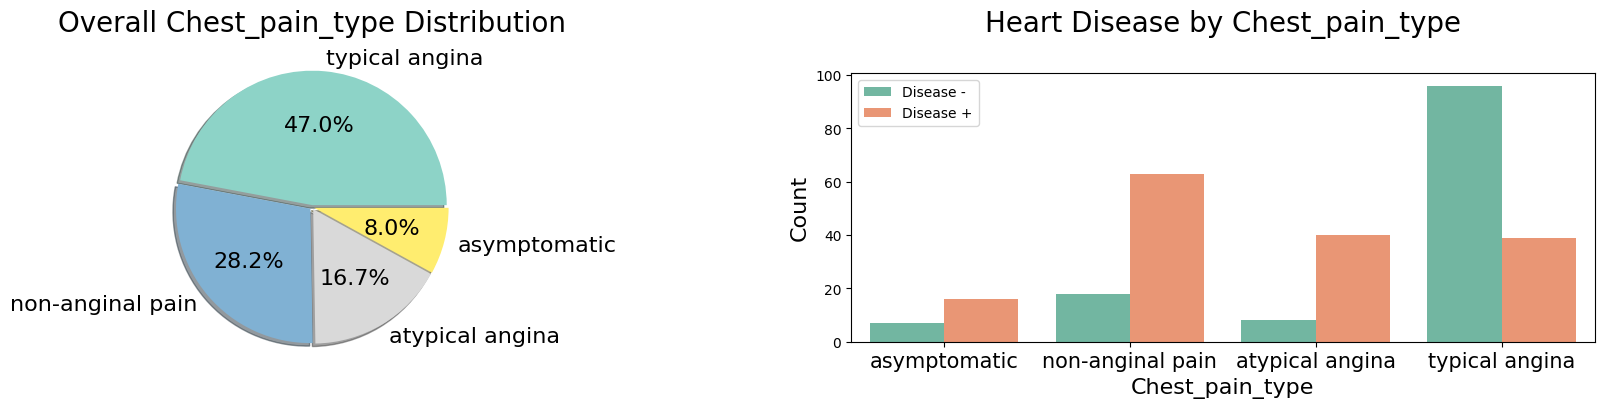

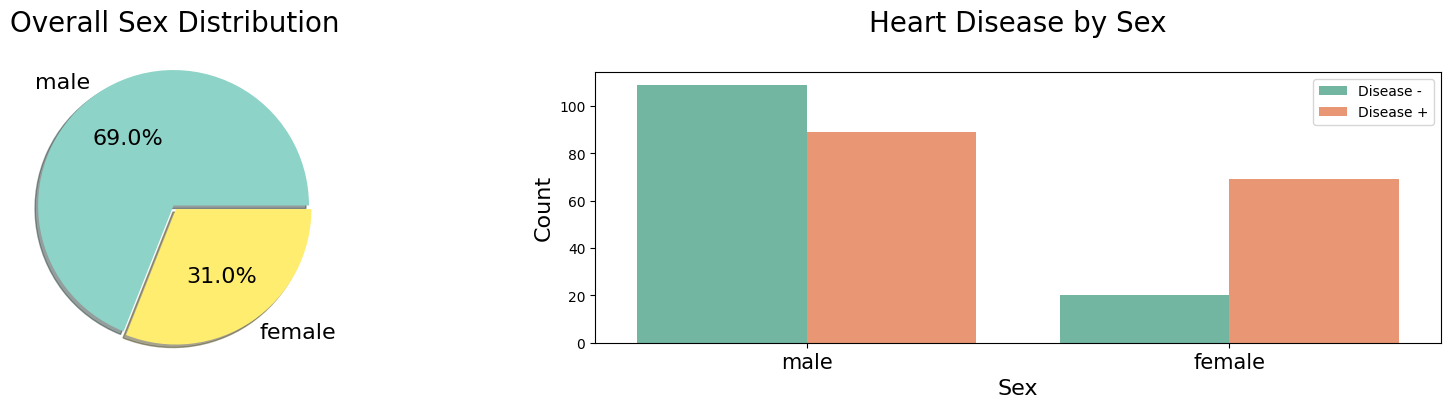

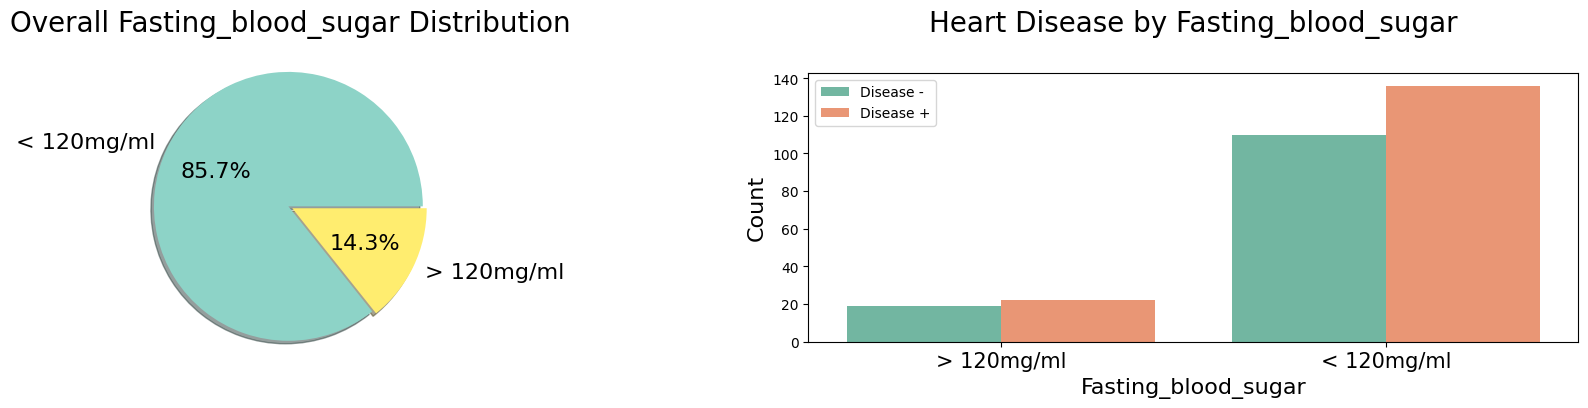

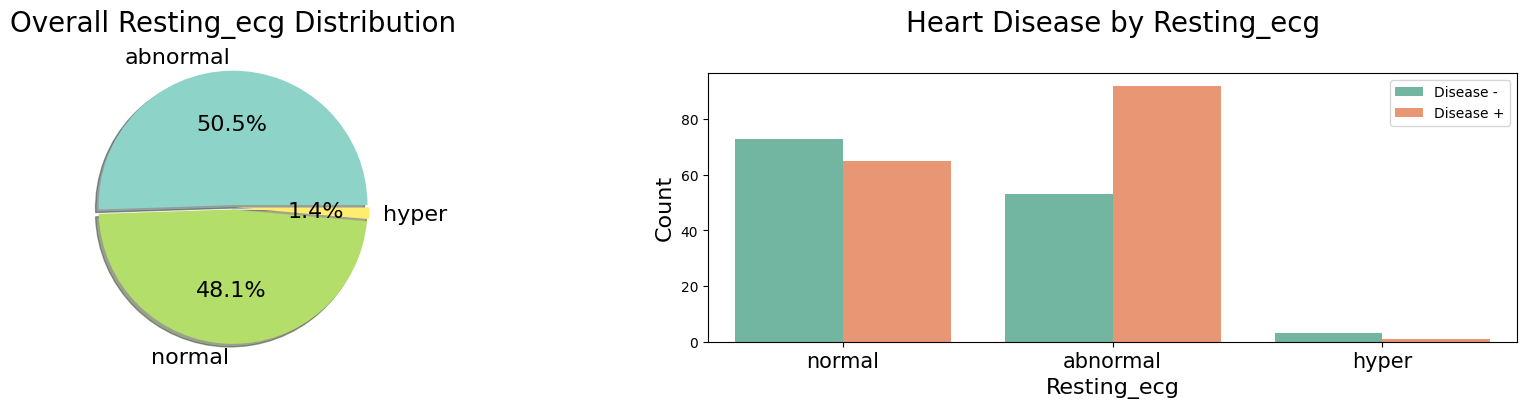

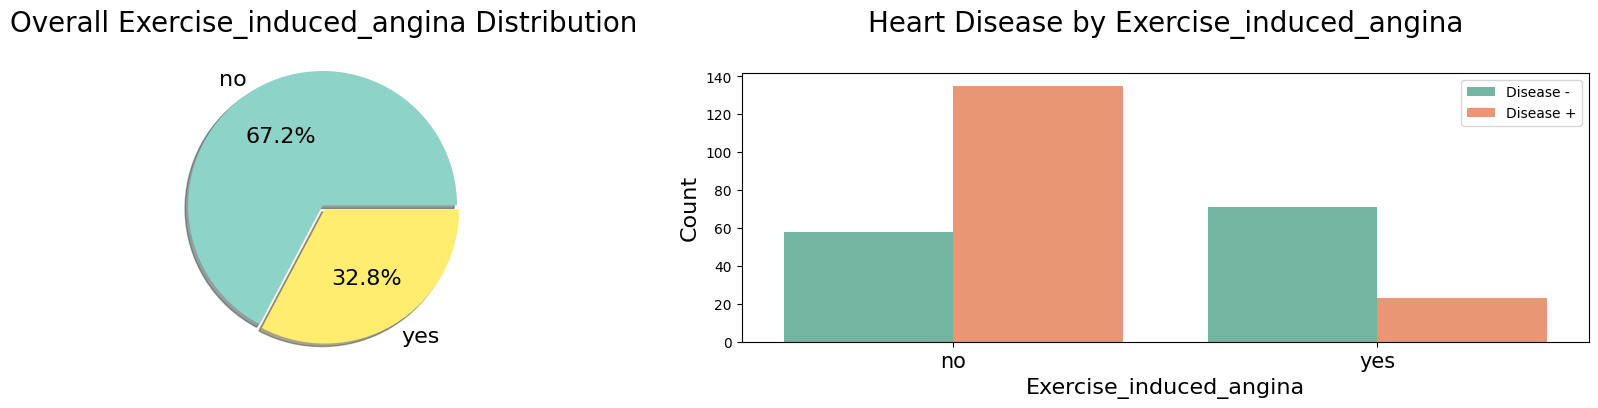

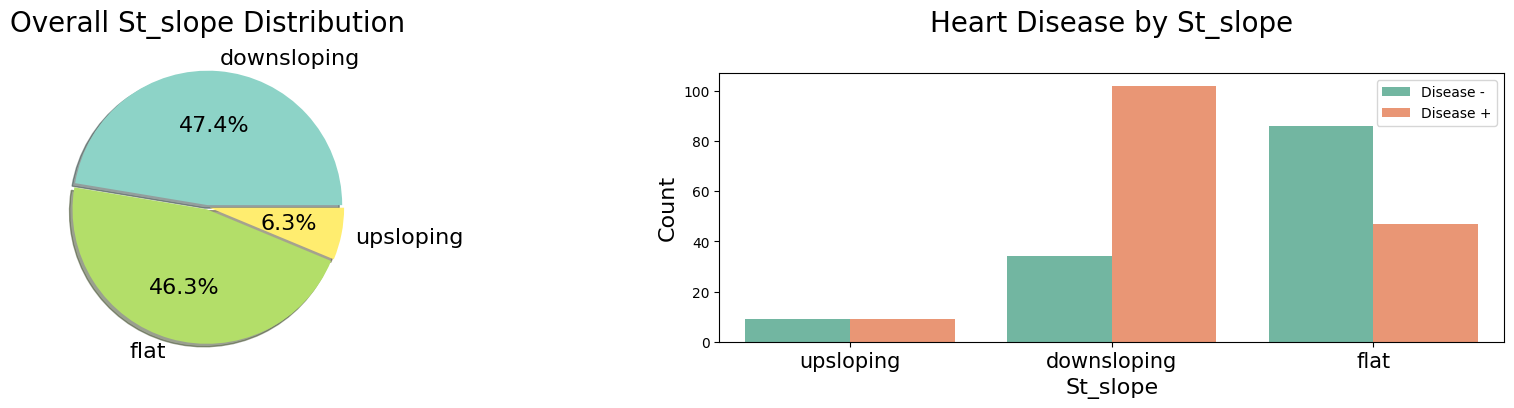

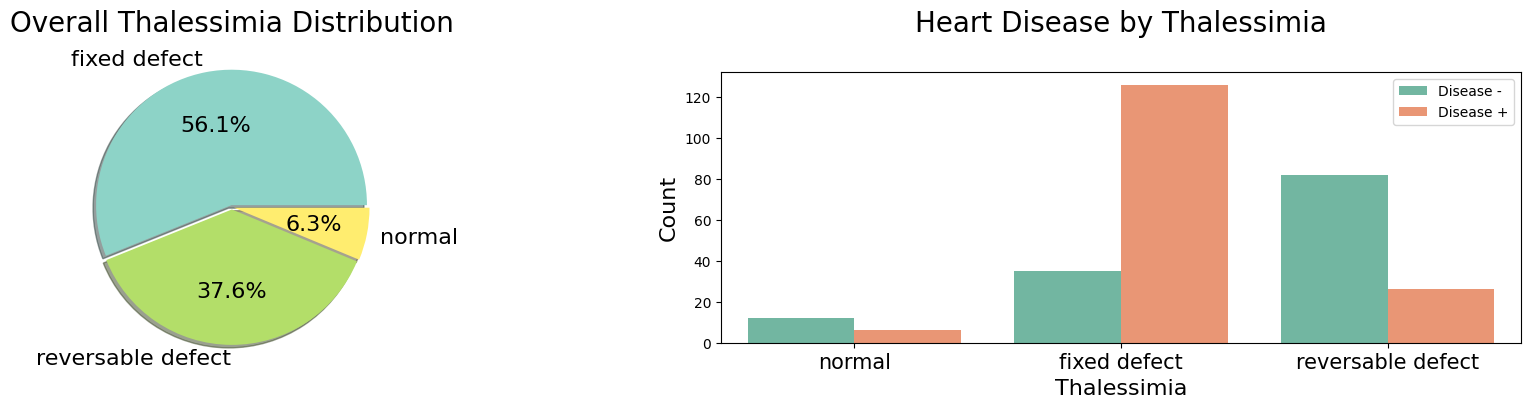

In [83]:
def des_cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,5))
    vc = graph_data[var].value_counts() 
    nouniq = graph_data[var].nunique()
    # overall pie
    vc.plot.pie(radius = 1.25,ax = axes[0], cmap = 'Set3', autopct = '%0.1f%%',
                                        textprops = {'family': 'DejaVu Sans','color': 'black','size': 16},
                                        explode = [0.02]*nouniq,shadow = True,)
    axes[0].set_ylabel('')
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()),family='DejaVu Sans',fontsize= 20)
    
    # count plot
    sns.countplot(x = graph_data[var], hue = graph_data.target, ax = axes[1], palette='Set2')
    plt.xticks( fontsize = 15, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_xlabel(var.capitalize(),fontsize = 16, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_ylabel('Count',fontsize = 16, color = 'black' , family =  'DejaVu Sans')
    axes[1].legend(['Disease -','Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format( var.capitalize()) ,family='DejaVu Sans',fontsize= 20)
    plt.tight_layout(pad = 4 )
    plt.show()
    
for i in graph_des_col_name :
    des_cat_plot(i)


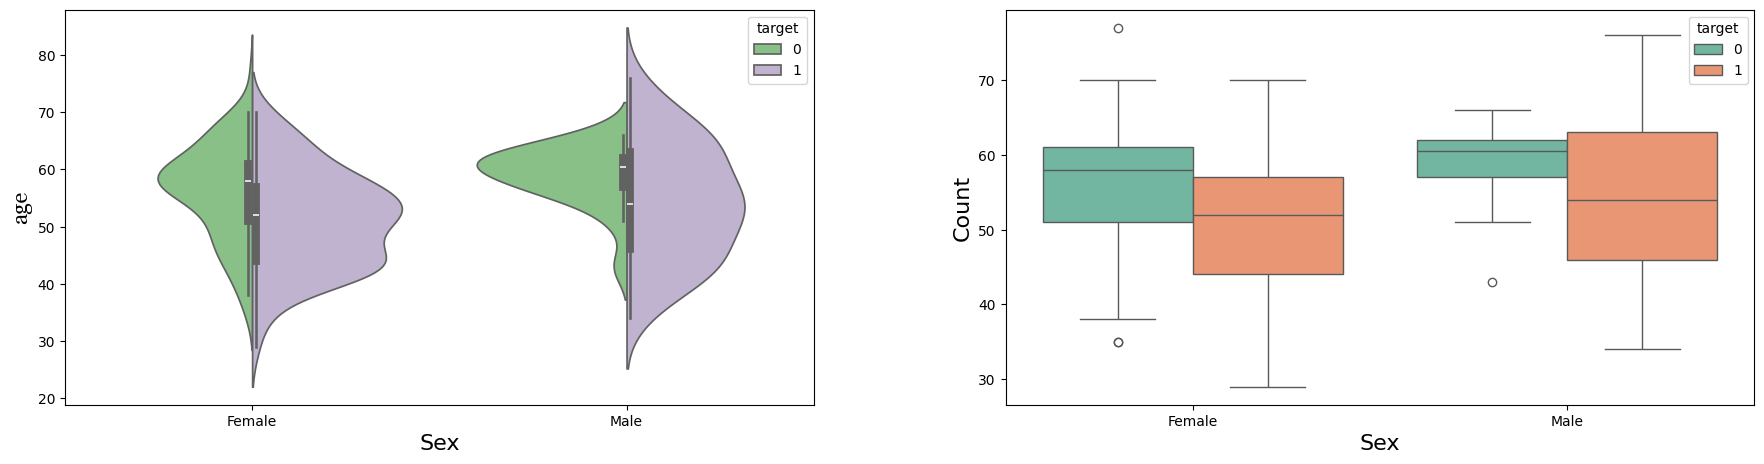

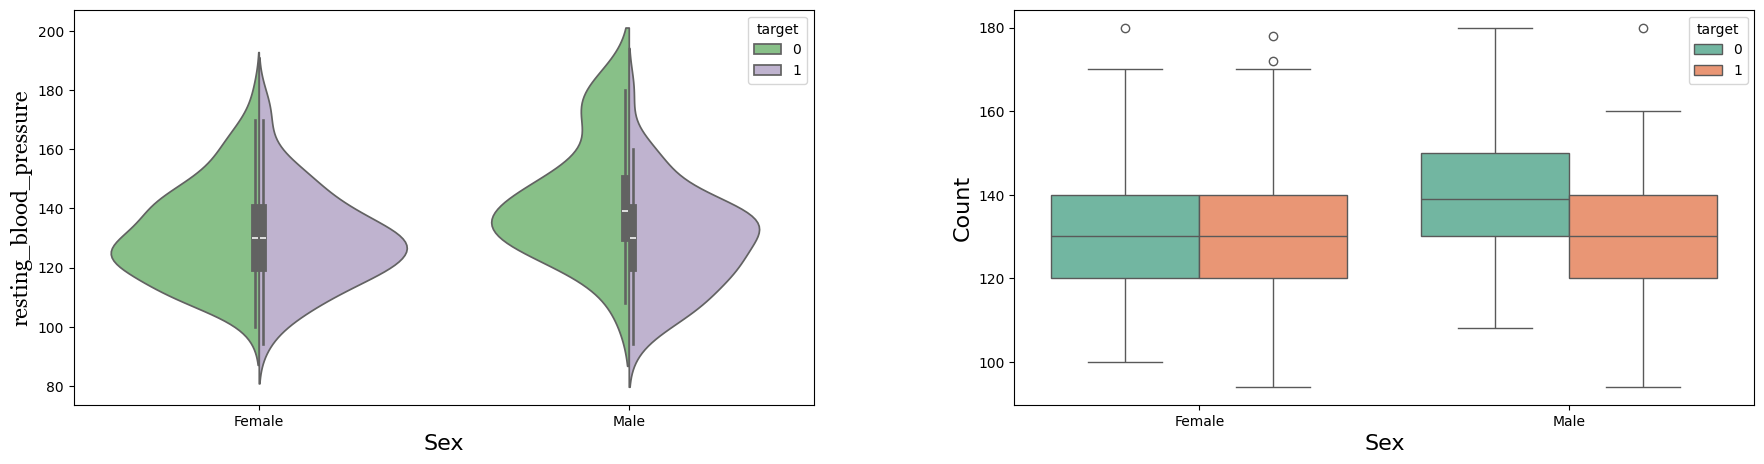

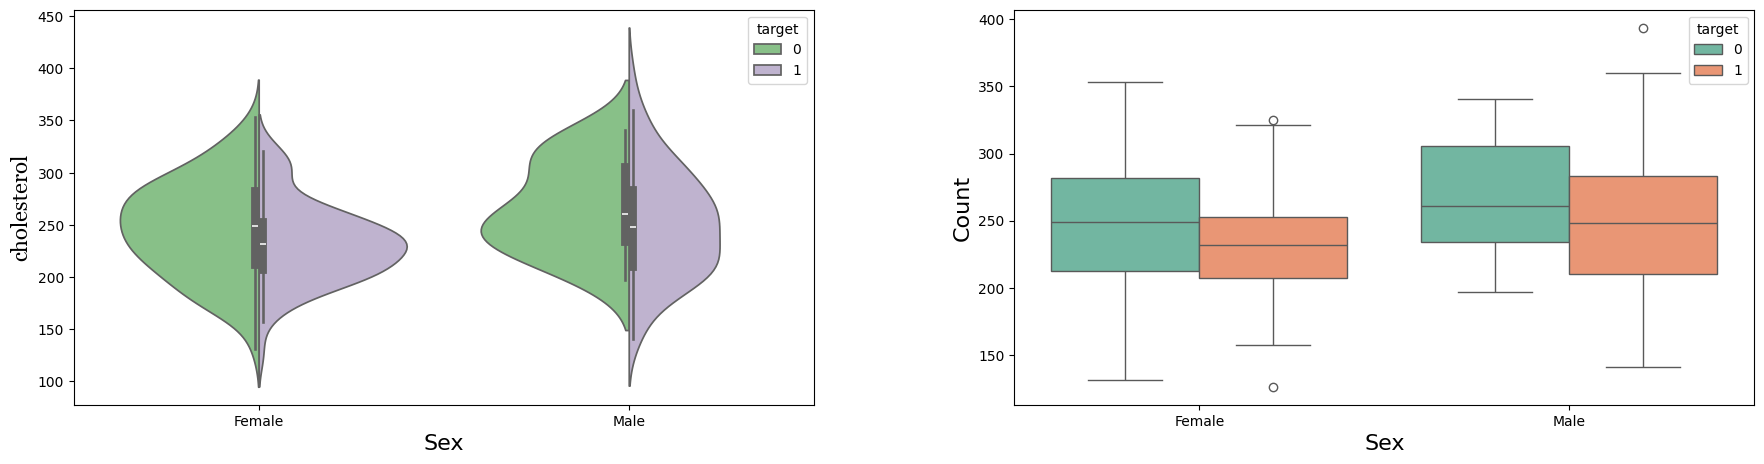

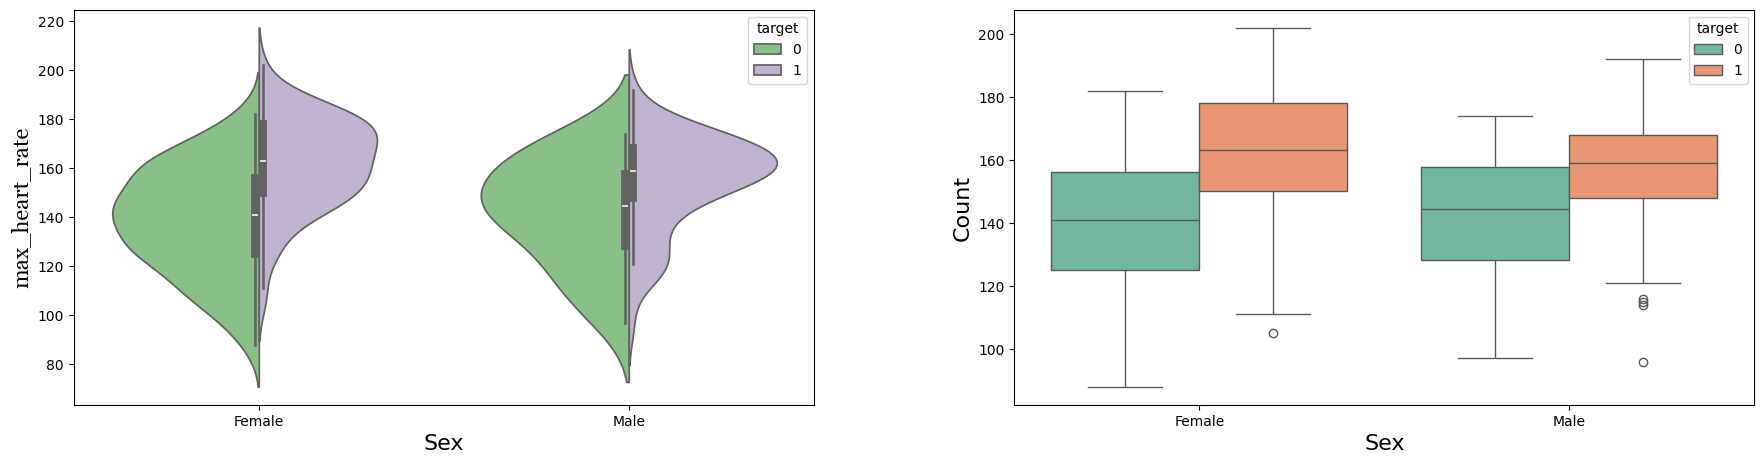

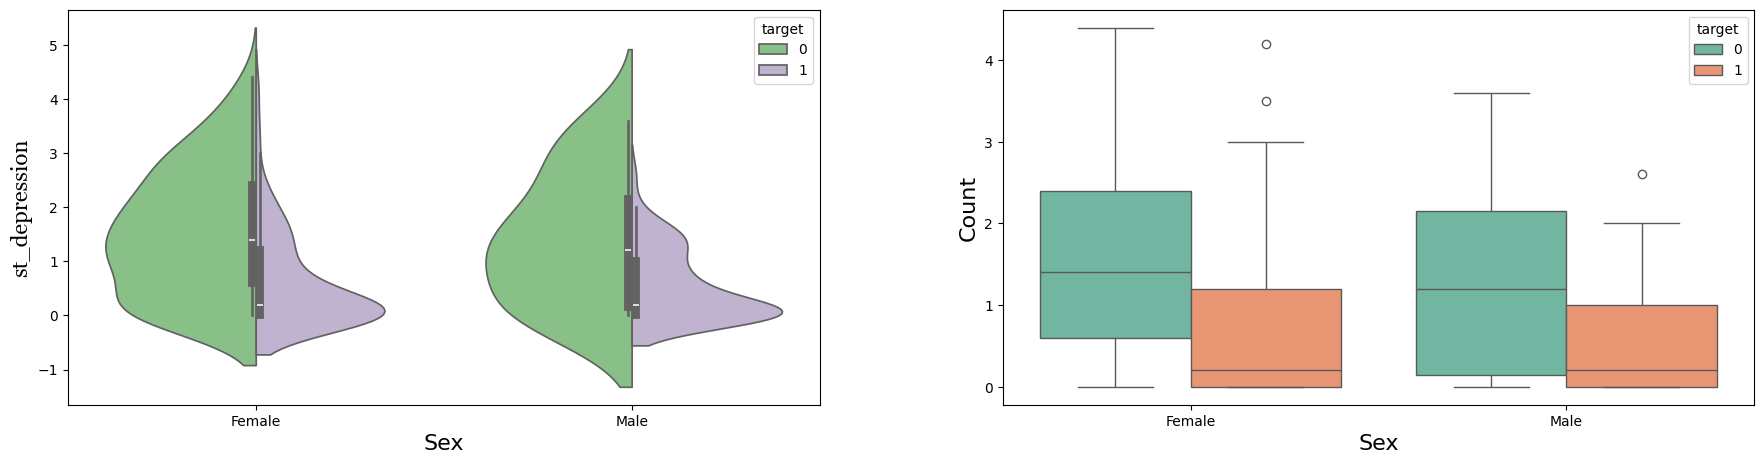

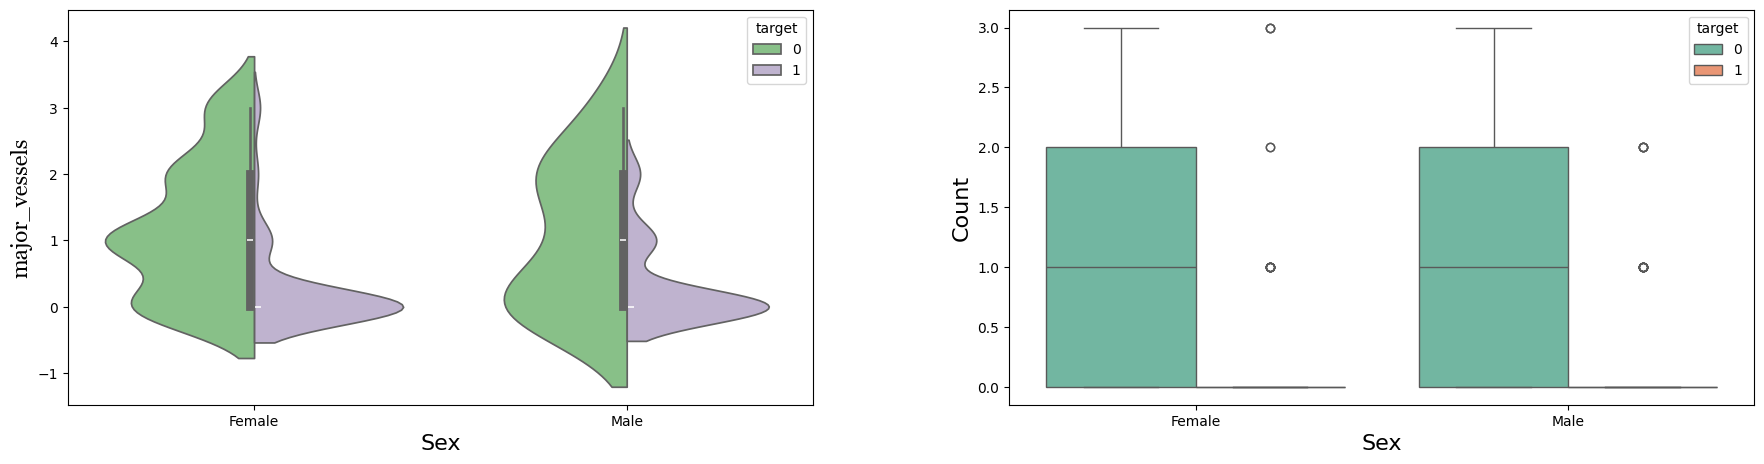

In [84]:
def des_violin_plot(var):
    f,axes = plt.subplots(1,2,figsize = (18,5))
    sns.violinplot(y = var, x = 'sex',hue = 'target',data = graph_data, split = True, palette= 'Accent', ax = axes[0])
    axes[0].set_xlabel('Sex', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[0].set_ylabel(var, fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
    axes[0].set_xticklabels(['Female','Male'])
    sns.boxplot(x = graph_data.sex,  y = graph_data[var], hue = graph_data.target, ax = axes[1], palette='Set2')
    axes[1].set_xticklabels(['Female','Male'])
    axes[1].set_xlabel('Sex',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16} )
    axes[1].set_ylabel('Count',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16} )
    plt.tight_layout(w_pad = 10, pad = 2)
    plt.show()
    
for i in graph_cont_col_name :
    des_violin_plot(i)

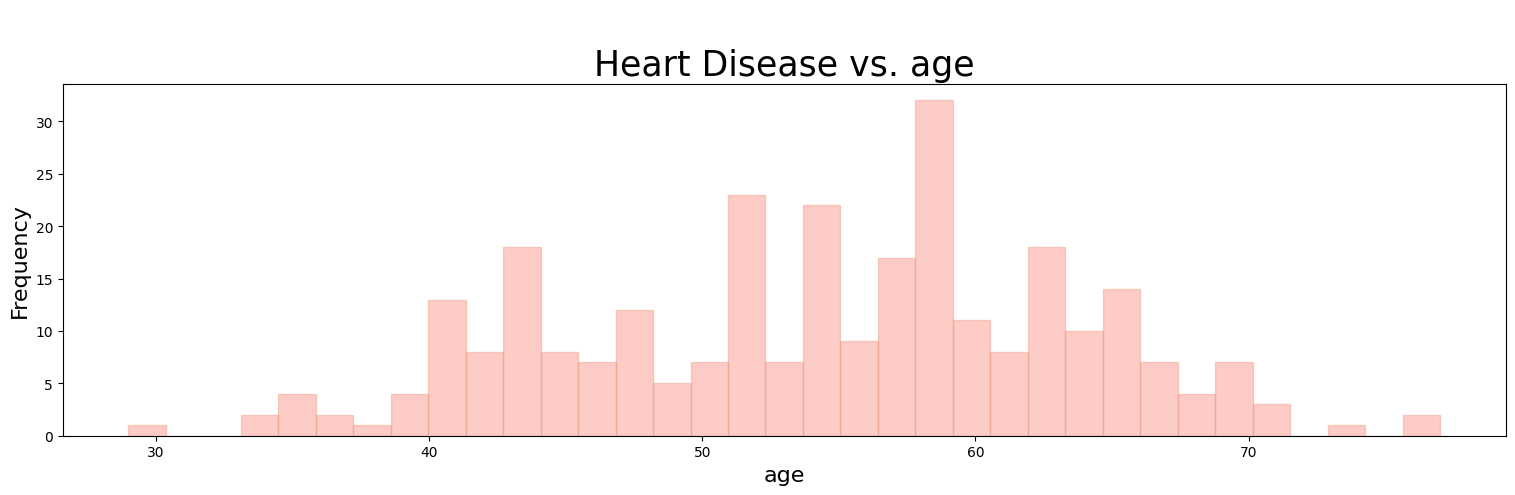

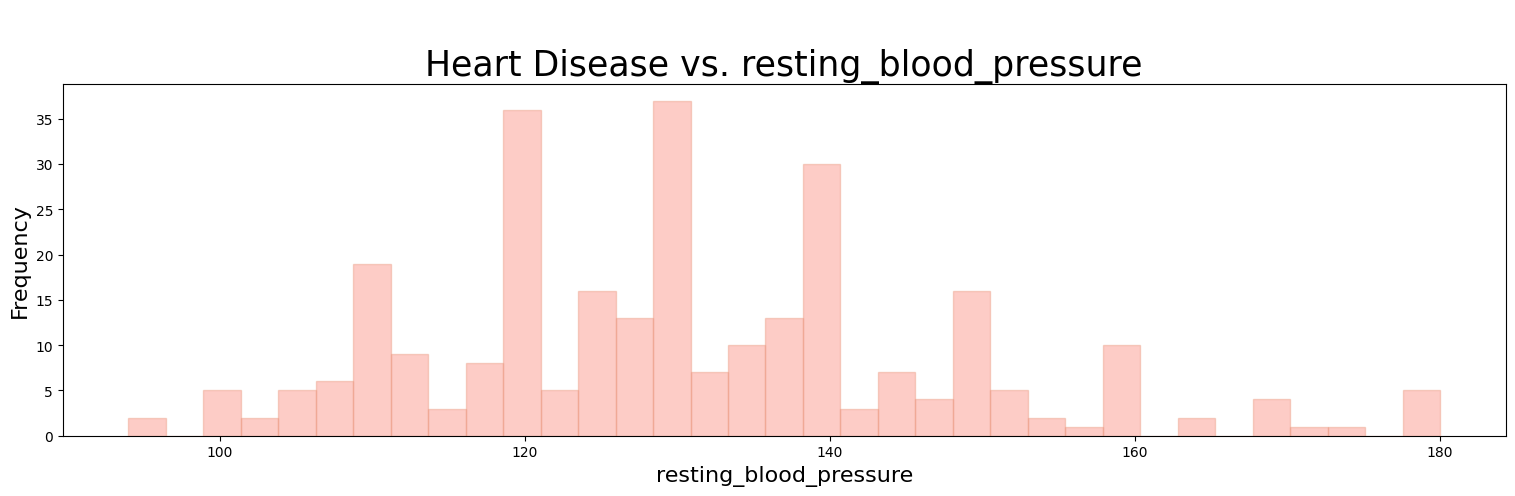

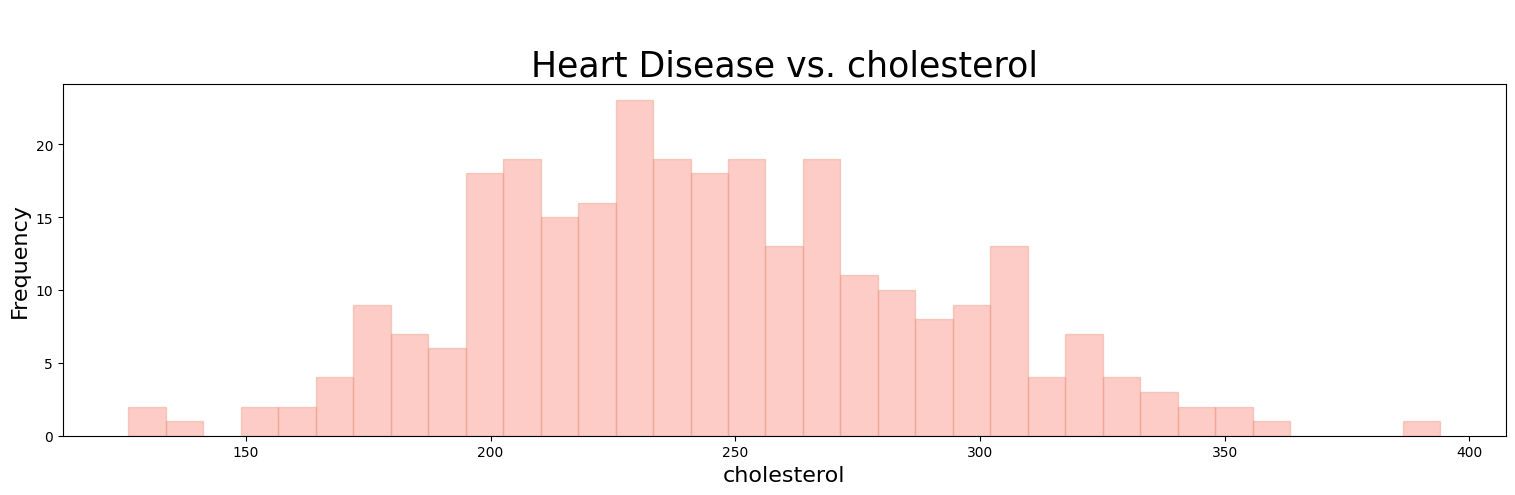

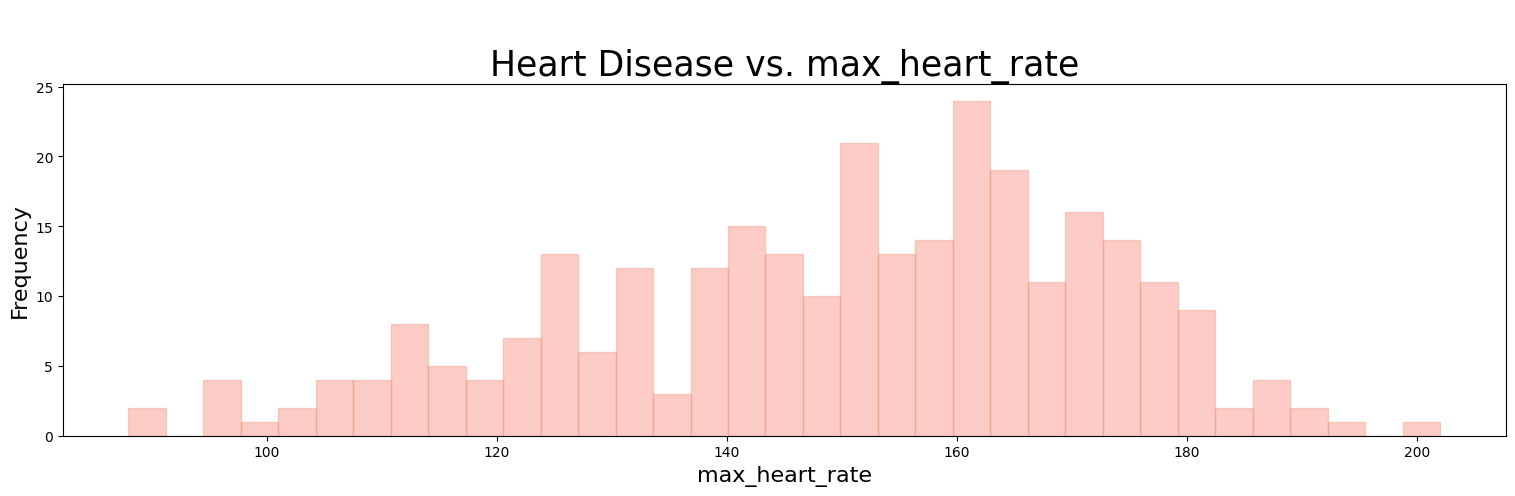

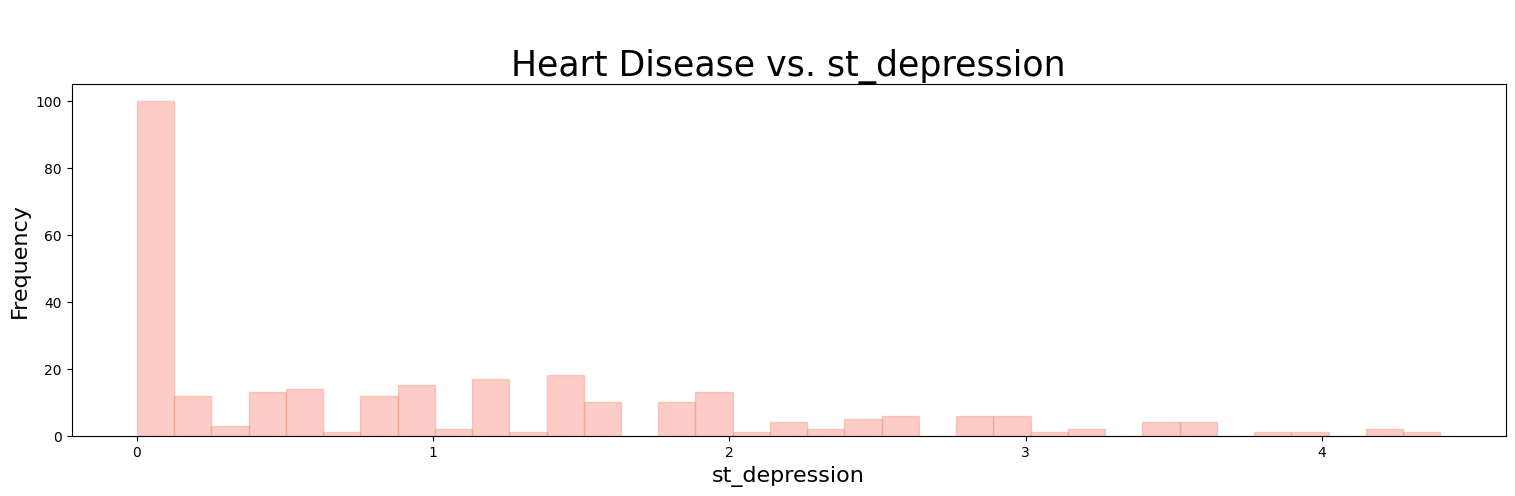

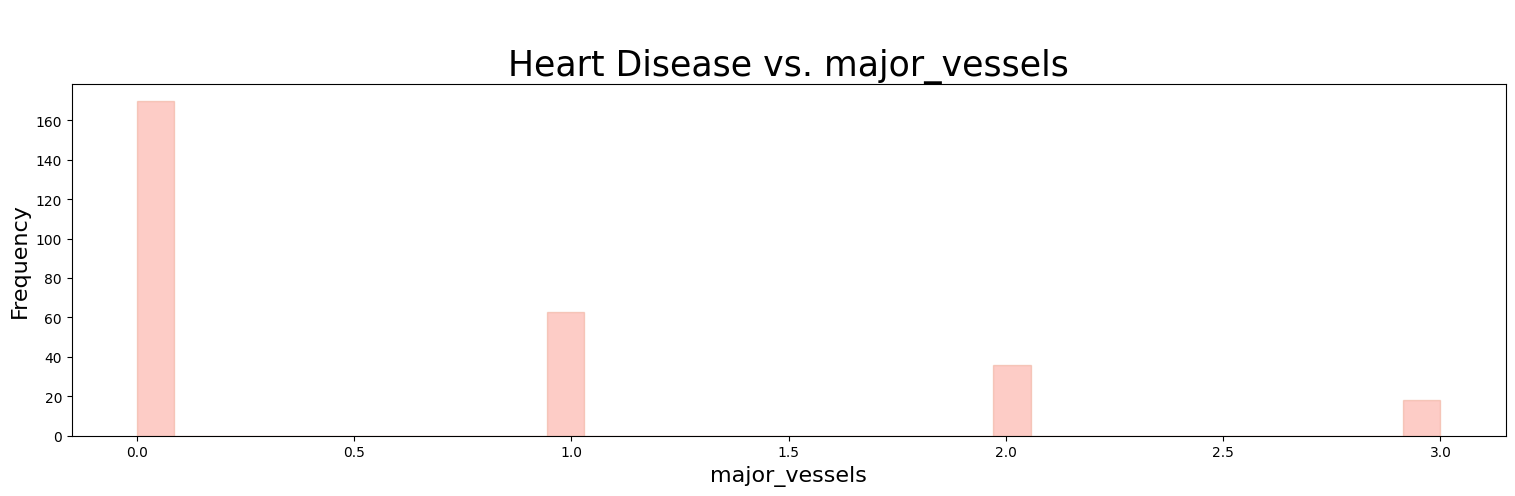

In [85]:
def cont_distplot(var) :
    plt.figure(figsize = (15,5))
    sns.distplot(graph_data[var], kde = False, bins = 35, hist_kws = {'edgecolor':'darksalmon', 'color' :'salmon'})
    plt.title('\nHeart Disease vs. '+var, family='DejaVu Sans',fontsize= 25)
    plt.tight_layout( )
    plt.xlabel(var,family='DejaVu Sans',fontsize= 16)
    plt.ylabel('Frequency',family='DejaVu Sans',fontsize= 16)
    plt.show()

for i in graph_cont_col_name :
    cont_distplot(i)

In [86]:
# perform chi2-square test for all columns to check the relationship between
# input variables and target
alpha = 0.05
picked_cols = set()
check_data = dataset.drop('target', axis=1)
for x in check_data.columns :
    ct = pd.crosstab(check_data[x], dataset['target'])
    stat, p_val, dof, expected = stats.chi2_contingency(ct)
    print("column:", x, "p_val:", p_val)
    if (p_val < alpha) :
        picked_cols.add(x)

column: age p_val: 0.10787022799599133
column: sex p_val: 5.62645102432648e-07
column: cp p_val: 1.8242881952306194e-15
column: trestbps p_val: 0.5989028678209443
column: chol p_val: 0.11086946140063769
column: fbs p_val: 0.980675443994167
column: restecg p_val: 0.010482022013481404
column: thalach p_val: 0.08158152930874675
column: exang p_val: 9.152051927976986e-13
column: oldpeak p_val: 4.056497596254438e-05
column: slope p_val: 4.729071984134035e-10
column: ca p_val: 2.4290320203422867e-15
column: thal p_val: 3.54495143104438e-18


In [87]:
print ("The factors can affect the occurrence of CVD determined by ch2_square test:", picked_cols)

The factors can affect the occurrence of CVD determined by ch2_square test: {'exang', 'oldpeak', 'cp', 'thal', 'ca', 'sex', 'restecg', 'slope'}


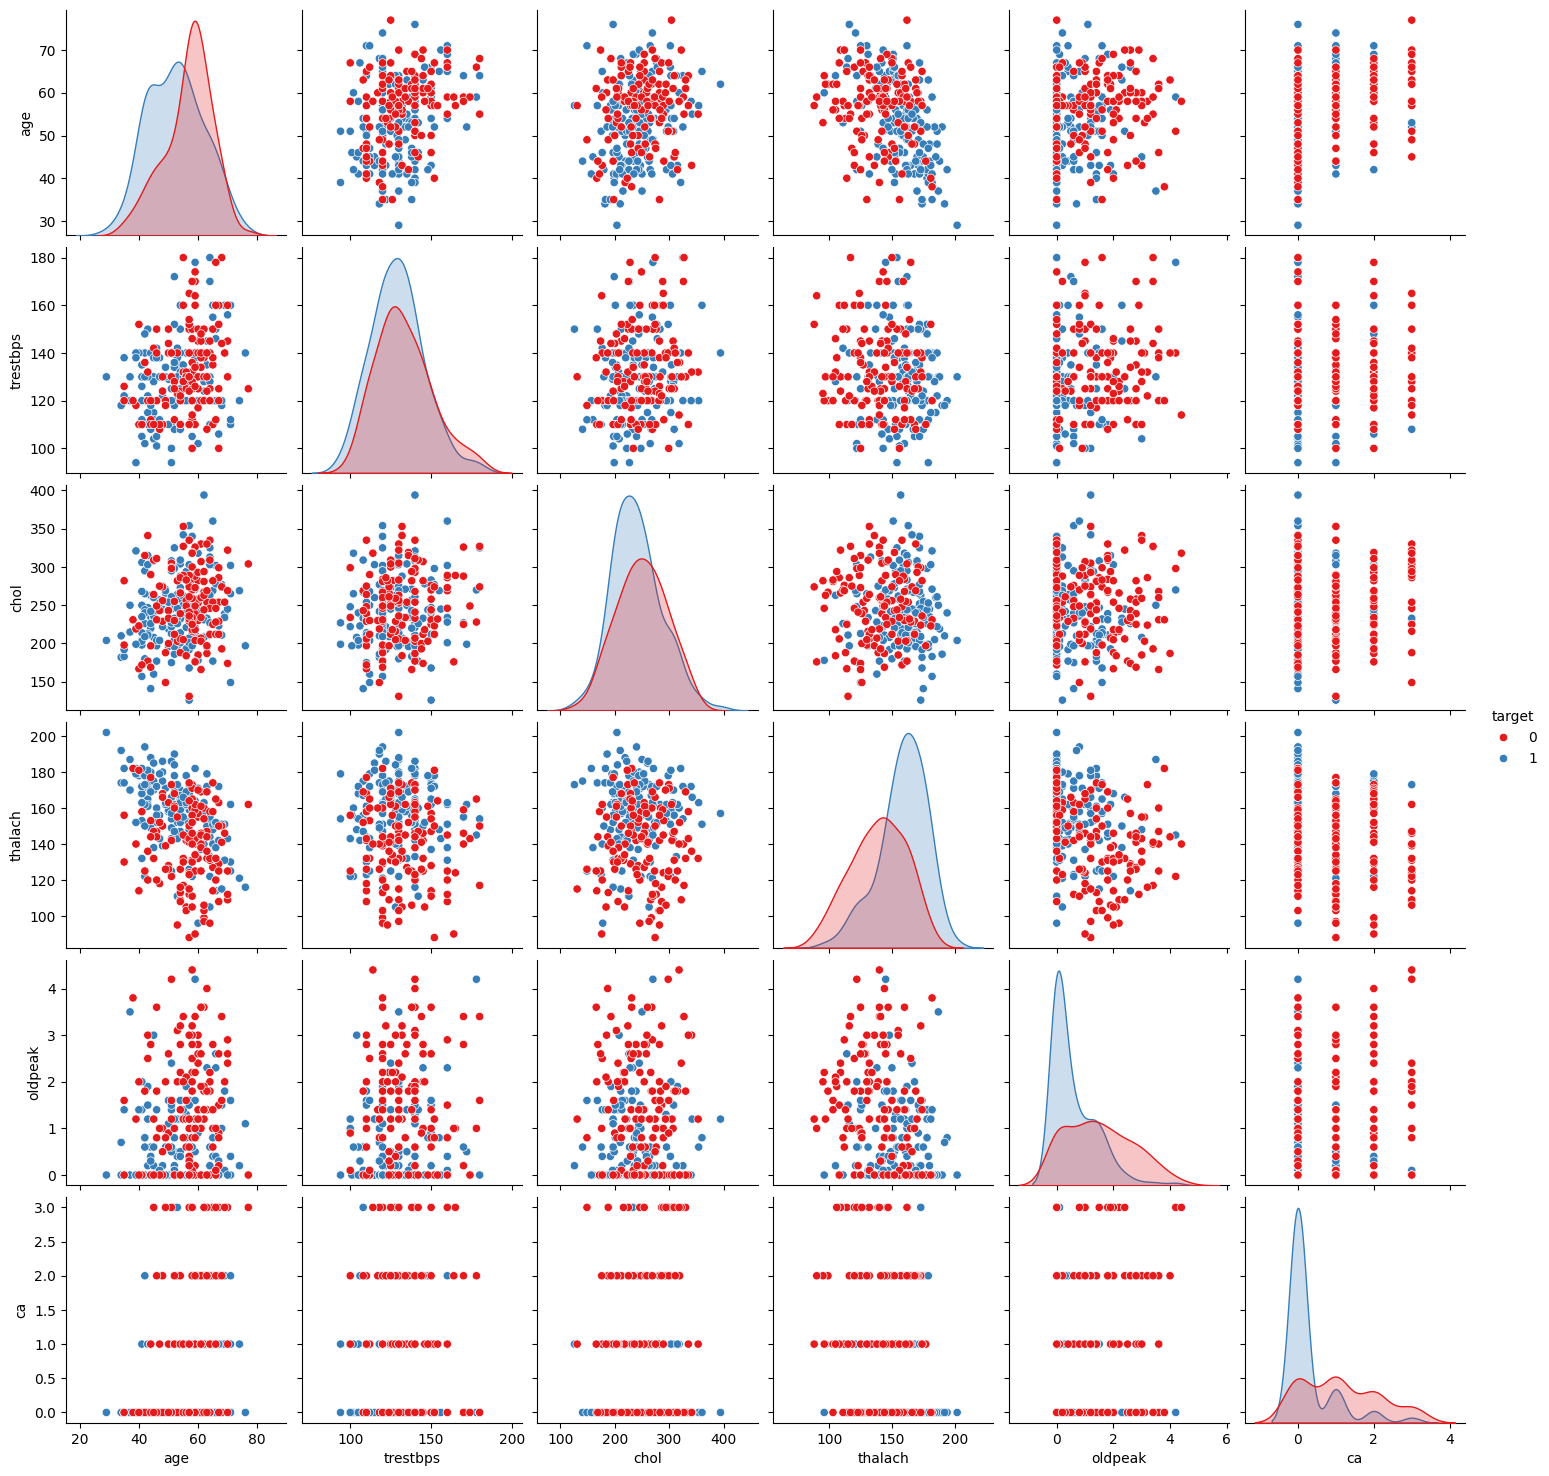

In [88]:
# j.Use a pair plot to understand the relationship between all the given variables
# draw the paiplot for the columns determined by ch2-square test
#-- plus the variable tahlach, of which correlation is greater than threshold=0.4

# paiplot of continuous variables and 'ca'to check relationship with target variable
cont_dataset = dataset[continuous_col_name]
cont_dataset['target'] = dataset['target']

sns.pairplot(cont_dataset, hue = 'target', palette='Set1')

In [89]:
# 3.Build a baseline model to predict the risk of a heart attack using a logistic
# regression and random forest and explore the results while using correlation 
# analysis and logistic regression (leveraging standard error and p-values 
# from statsmodels) for feature selection

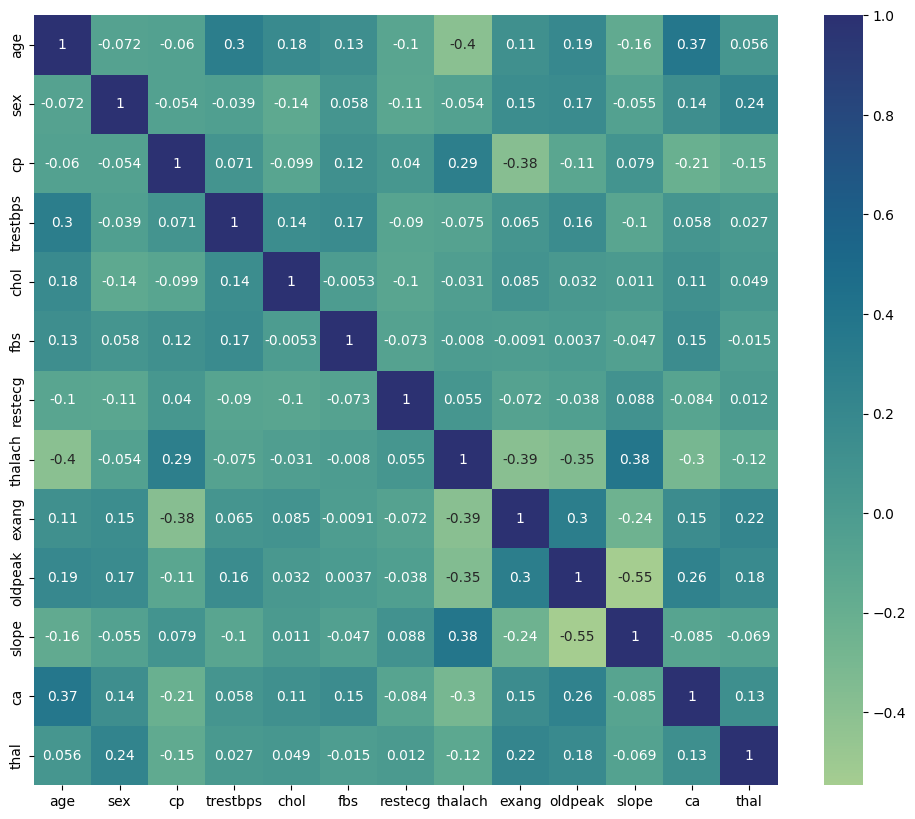

In [90]:
# To study if input vaiables have relationship with each other

# exculde target
dataset_x = dataset.drop(['target'], axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(dataset_x.corr(),annot=True,cmap='crest')
plt.show()

In [91]:
def correlated(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname1=corr_matrix.columns[i]
                colname2=corr_matrix.columns[j]
                col_corr.add(colname1+"~"+colname2)
    return col_corr

dataset_x = dataset.drop(['target'], axis=1)

print("correlation > 0.3 :", correlated(dataset_x, 0.3))
print("correlation > 0.5 :", correlated(dataset_x, 0.5))
print("=> ", correlated(dataset_x, 0.5), "has the strongest nagative relationship with oldpeak" )

correlation > 0.3 : {'slope~thalach', 'oldpeak~thalach', 'exang~thalach', 'trestbps~age', 'exang~cp', 'slope~oldpeak', 'ca~age', 'thalach~age'}
correlation > 0.5 : {'slope~oldpeak'}
=>  {'slope~oldpeak'} has the strongest nagative relationship with oldpeak


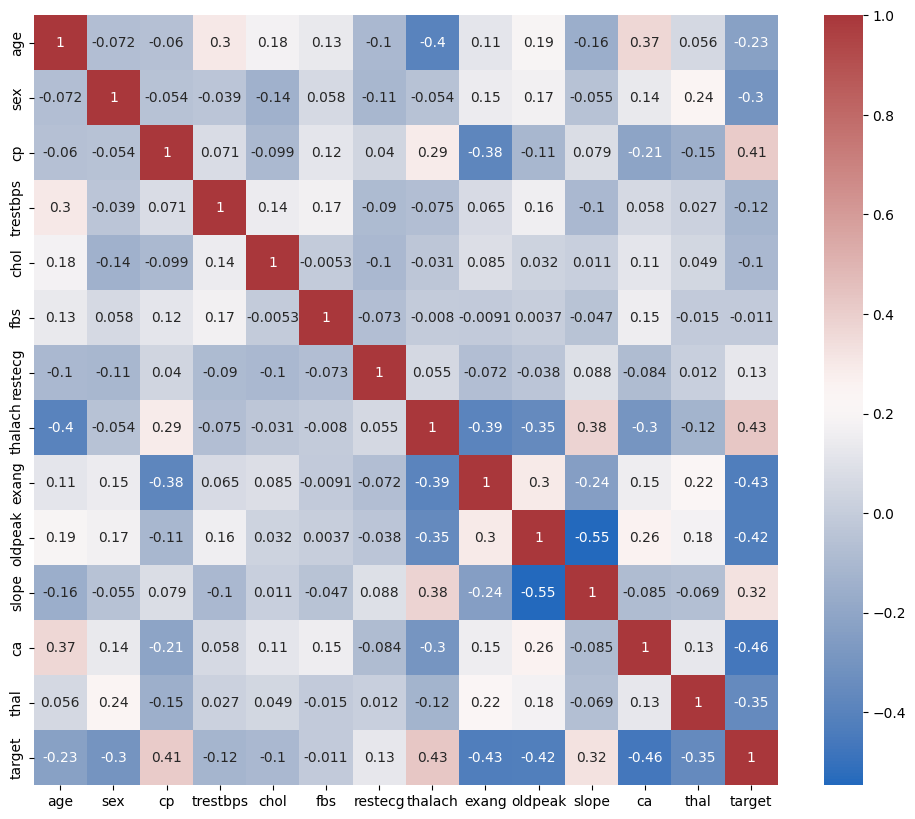

In [92]:
# To study that input vaiables have positive or negative relationship with target

# include target
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True,cmap='vlag')
plt.show()

In [93]:
def correlated_target(data,threshhold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix)):
        if abs(corr_matrix.iloc[i,len(corr_matrix)-1]) > threshhold:
            colname=corr_matrix.columns[i]
            if corr_matrix.iloc[i,len(corr_matrix)-1] == 1 :
                break
            else :
                col_corr.add(colname)
                print("[", colname, " corr:", corr_matrix.iloc[i,len(corr_matrix)-1],"]")
    return col_corr

print("=> correlation with CVD > 0.3 or < -0.3:", correlated_target(dataset, 0.3))
print("=> correlation with CVD > 0.35 or < -0.32:", correlated_target(dataset, 0.35))
print("=> correlation with CVD > 0.4 or < -0.4:", correlated_target(dataset, 0.4))

[ sex  corr: -0.30292599969187217 ]
[ cp  corr: 0.408569993598396 ]
[ thalach  corr: 0.4315190760630021 ]
[ exang  corr: -0.42908230720175317 ]
[ oldpeak  corr: -0.4244427305502365 ]
[ slope  corr: 0.3239482956635991 ]
[ ca  corr: -0.4632576724888142 ]
[ thal  corr: -0.35457910827729694 ]
=> correlation with CVD > 0.3 or < -0.3: {'exang', 'oldpeak', 'cp', 'thal', 'ca', 'sex', 'thalach', 'slope'}
[ cp  corr: 0.408569993598396 ]
[ thalach  corr: 0.4315190760630021 ]
[ exang  corr: -0.42908230720175317 ]
[ oldpeak  corr: -0.4244427305502365 ]
[ ca  corr: -0.4632576724888142 ]
[ thal  corr: -0.35457910827729694 ]
=> correlation with CVD > 0.35 or < -0.32: {'exang', 'oldpeak', 'cp', 'thal', 'ca', 'thalach'}
[ cp  corr: 0.408569993598396 ]
[ thalach  corr: 0.4315190760630021 ]
[ exang  corr: -0.42908230720175317 ]
[ oldpeak  corr: -0.4244427305502365 ]
[ ca  corr: -0.4632576724888142 ]
=> correlation with CVD > 0.4 or < -0.4: {'exang', 'oldpeak', 'cp', 'ca', 'thalach'}


In [94]:
picked_cols.add('thalach')
print ("=>The factor can affect the occurrence of CVD determined by correlation : {'thalac'}")
print ("=>The final factors for occurrence of CVD determined by Chi-square Test and Correlation :",
      picked_cols)
X = dataset[['thal', 'thalach', 'sex', 'ca', 'restecg', 'oldpeak', 'slope', 'exang', 'cp']]
y = dataset.iloc[:, -1]

=>The factor can affect the occurrence of CVD determined by correlation : {'thalac'}
=>The final factors for occurrence of CVD determined by Chi-square Test and Correlation : {'exang', 'oldpeak', 'cp', 'thal', 'ca', 'sex', 'restecg', 'thalach', 'slope'}


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [96]:
for the_c in [0.1, 1000, 10000, 73000, 75000, 80000]:
    log = LogisticRegression(C=the_c)
    log_reg = log.fit(X_train, y_train)

    predictions = log_reg.predict(X_test)
    
    train_score = log_reg.score(X_train, y_train)
    test_score = log_reg.score(X_test, y_test)
    print ('Accuracy of Logistic regression on training set(C={:.1f}): {:.4f}'
       .format(the_c, train_score))
    print ('Accuracy of Logistic regression on test set(C={:.1f}): {:.4f}'
       .format(the_c, test_score))

Accuracy of Logistic regression on training set(C=0.1): 0.8558
Accuracy of Logistic regression on test set(C=0.1): 0.8750
Accuracy of Logistic regression on training set(C=1000.0): 0.8558
Accuracy of Logistic regression on test set(C=1000.0): 0.8889
Accuracy of Logistic regression on training set(C=10000.0): 0.8558
Accuracy of Logistic regression on test set(C=10000.0): 0.8889
Accuracy of Logistic regression on training set(C=73000.0): 0.8558
Accuracy of Logistic regression on test set(C=73000.0): 0.8889
Accuracy of Logistic regression on training set(C=75000.0): 0.8512
Accuracy of Logistic regression on test set(C=75000.0): 0.8750
Accuracy of Logistic regression on training set(C=80000.0): 0.8558
Accuracy of Logistic regression on test set(C=80000.0): 0.8750


In [97]:
# hyperparameter tunning for LogisticRegression for fun
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
grid_vals = {'penalty': ['l1','l2'], 'C': [1000, 10000, 73000]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', 
                       cv=6, refit=True, return_train_score=True) 

#Training and Prediction

grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)

train_score = grid_lr.best_estimator_.score(X_train, y_train)
test_score = grid_lr.best_estimator_.score(X_test, y_test)
print ("===== Hyperparameter Tunning with GridSearchCV =====")
print ('Accuracy of Logistic regression on training set: {:.4f}'
       .format(train_score))
print ('Accuracy of Logistic regression on test set: {:.4f}'
       .format(test_score))

===== Hyperparameter Tunning with GridSearchCV =====
Accuracy of Logistic regression on training set: 0.8558
Accuracy of Logistic regression on test set: 0.8889


In [98]:
# RandomForest model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix (y_test, predictions))


              precision    recall  f1-score   support

           0       0.76      0.88      0.82        33
           1       0.88      0.77      0.82        39

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.83      0.82      0.82        72

[[29  4]
 [ 9 30]]


In [99]:
# hyperparameter tunning for RandomForest using TPOTClassifier

#from tpot import TPOTClassifier
#tpot_clf = TPOTClassifier(generations=50, population_size=302, 
#                          verbosity=2, offspring_size=50, scoring='accuracy', cv=6)
#Training and prediction

#tpot_clf.fit(X_train, y_train)
#tpot_pred = tpot_clf.score(X_test, y_test)

In [100]:
# Best pipeline: GradientBoostingClassifier(RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.05, min_samples_leaf=6, min_samples_split=2, n_estimators=100), learning_rate=0.1, max_depth=9, max_features=0.15000000000000002, min_samples_leaf=10, min_samples_split=8, n_estimators=100, subsample=0.25)
from sklearn.ensemble import GradientBoostingClassifier
rf = RandomForestClassifier(bootstrap=True, criterion='gini', max_features=0.05, min_samples_leaf=6, min_samples_split=2, n_estimators=100)
tunned_rf = GradientBoostingClassifier(init=rf, learning_rate=0.1, max_depth=9, max_features=0.15000000000000002, min_samples_leaf=10, min_samples_split=8, n_estimators=100, subsample=0.25)
tunned_rf.fit(X_train, y_train)
print ("===== Hyperparameter Tunning with TPOTClassifier =====")
print(tunned_rf.score(X_train, y_train))
print(tunned_rf.score(X_test, y_test))
preds = tunned_rf.predict(X_test)
print(classification_report(y_test, preds))
print(confusion_matrix (y_test, preds))


===== Hyperparameter Tunning with TPOTClassifier =====
0.9162790697674419
0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.86      0.82      0.84        39

    accuracy                           0.83        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.84      0.83      0.83        72

[[28  5]
 [ 7 32]]


===== Hyperparameter Tunning with RandomizedSearchCV =====
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        33
           1       0.88      0.77      0.82        39

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.83      0.82      0.82        72



<Axes: >

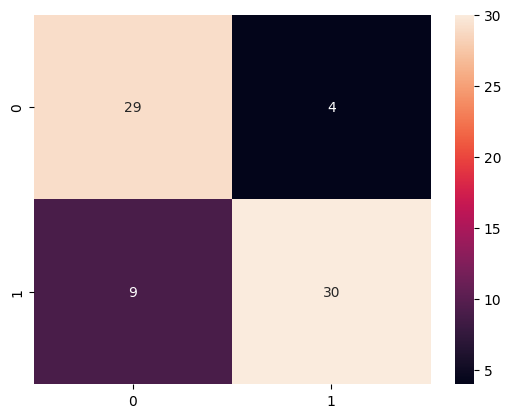

In [101]:
# hyperparameter tunning for RandomForest using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()
param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100, 200, 300, 400]}
random_rf = RandomizedSearchCV(estimator=model, param_distributions=param_vals,
                              n_iter=10, scoring='accuracy', cv=5,
                              refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(X_train, y_train)
preds = random_rf.best_estimator_.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print ("===== Hyperparameter Tunning with RandomizedSearchCV =====")
print(classification_report(y_test, preds))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)


In [102]:
# 3.Build a baseline model to predict the risk of a heart attack using a logistic
# regression and random forest and explore the results while using correlation 
# analysis and logistic regression (leveraging standard error and p-values 
# from statsmodels) for feature selection

# Lets use statsmodel Logit Regression
# with columns chosen by correlation and Xi-Squre test

X = dataset.drop('target', axis = 1)
y = dataset.target

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

log_reg

Optimization terminated successfully.
         Current function value: 0.351272
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  200
Model:                          Logit   Df Residuals:                      187
Method:                           MLE   Df Model:                           12
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.4869
Time:                        12:23:52   Log-Likelihood:                -70.254
converged:                       True   LL-Null:                       -136.93
Covariance Type:            nonrobust   LLR p-value:                 1.304e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0302      0.025      1.189      0.234      -0.020       0.080
sex           -1.0892      0.

Accuracy score : 0.8966
Recall score : 0.9333
Precision score : 0.8750
f1 score : 0.9032


<Axes: >

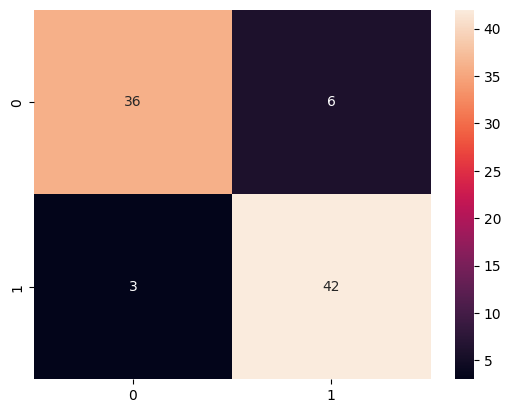

In [103]:
logreg_pred = log_reg.predict(X_test)
preds = list(map(round, logreg_pred))

print('Accuracy score : {:.4f}'.format(accuracy_score(y_test, preds)))
print('Recall score : {:.4f}'.format(recall_score(y_test, preds)))
print('Precision score : {:.4f}'.format(precision_score(y_test, preds)))
print('f1 score : {:.4f}'.format(f1_score(y_test, preds)))
cm = confusion_matrix(y_test,preds)
sns.heatmap(cm,annot=True)

In [104]:
# Logistic Regression After Feature Selection by Standard Error and correlation p-value
new_features = ['sex','cp','thalach','exang','ca','thal','slope']
new_X = dataset[new_features]


X2_train, X2_test, y2_train, y2_test = train_test_split(new_X, y, test_size=0.3, random_state = 7)

In [105]:
log_reg2 = sm.Logit(y2_train,X2_train).fit()
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.369547
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  200
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.4603
Time:                        12:23:53   Log-Likelihood:                -73.909
converged:                       True   LL-Null:                       -136.93
Covariance Type:            nonrobust   LLR p-value:                 8.716e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex           -1.2623      0.488     -2.585      0.010      -2.219      -0.305
cp             0.7602      0.

Accuracy score : 0.8966
Recall score : 0.9333
Precision score : 0.8750
f1 score : 0.9032


<Axes: >

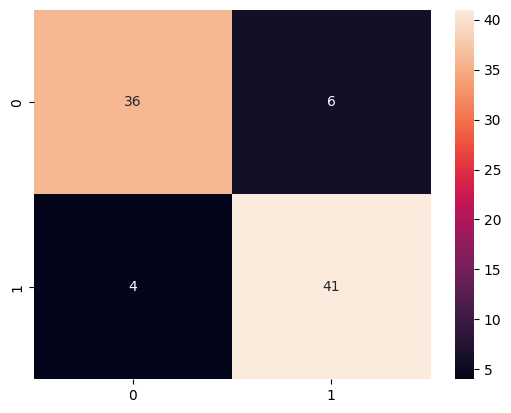

In [106]:
logreg2_pred = log_reg2.predict(X2_test)
preds2 = list(map(round, logreg2_pred))

print('Accuracy score : {:.4f}'.format(accuracy_score(y_test, preds)))
print('Recall score : {:.4f}'.format(recall_score(y_test, preds)))
print('Precision score : {:.4f}'.format(precision_score(y_test, preds)))
print('f1 score : {:.4f}'.format(f1_score(y_test, preds)))
cm = confusion_matrix(y2_test, preds2)
sns.heatmap(cm,annot=True)

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.80      0.91      0.85        45

    accuracy                           0.84        87
   macro avg       0.85      0.84      0.84        87
weighted avg       0.84      0.84      0.84        87



<Axes: >

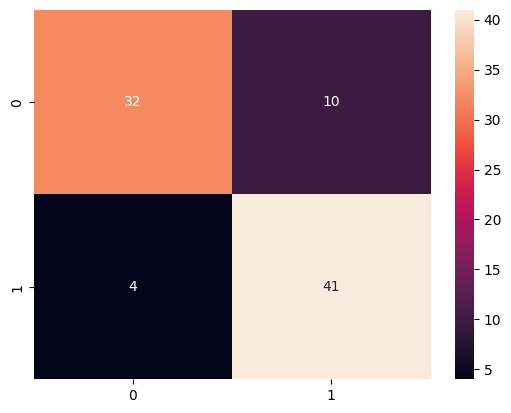

In [107]:
# Randomforest Classification After Feature Selection by Standard Error and correlation p-value
# new_features = ['sex','cp','thalach','restecg', 'exang','ca','thal','slope']

X2_train, X2_test, y2_train, y2_test = train_test_split(new_X, y, test_size=0.3, random_state = 7)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X2_train, y2_train)

predictions = rfc.predict(X2_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y2_test, predictions))
cm = confusion_matrix (y2_test, predictions)
sns.heatmap(cm, annot=True)


In [108]:
# Done by Sun Young Kim